In [1]:
import numpy as np
import pandas as pd

# Data Description and Feature Exploration

In [2]:
# Reading Traffic Crashes Dataset csv file and parsing dates from CRASH_DATE and DATE_POLICE_NOTIFIED
# By Setting low_memory=False from its default (True) allows pandas to have enough memory to guess format
# of each column it reads. Without this pandas gets confused and returns error


df_main = pd.read_csv('C:\\Users\\akshay gera\\Udemy ML in Python 2022\\Traffic_Crashes_-_Crashes.csv', 
                 parse_dates=[3, 21], low_memory=False)

In [3]:
df_main.head()


,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,2019-07-10 17:56:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,2017-06-30 16:00:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,2020-07-10 10:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,2020-07-11 01:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,2020-07-08 14:00:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [4]:
# Checking the dimensions of our dataset

df_main.shape

(472952, 49)

# Observation

Traffic Crashes Dataset contains 472,952 records with 49 columns. Since we will have to focus on efficiency, we will sample 10,000 records from this dataset

In [5]:
# To Display and better understand the data and it's 49 attributes, we have transposed the DataFrame

df_main.head().transpose()

,0,1,2,3,4
CRASH_RECORD_ID,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...
RD_NO,JC343143,JA329216,JD292400,JD293602,JD290451
CRASH_DATE_EST_I,NaN,NaN,NaN,NaN,NaN
CRASH_DATE,2019-07-10 17:56:00,2017-06-30 16:00:00,2020-07-10 10:25:00,2020-07-11 01:00:00,2020-07-08 14:00:00
POSTED_SPEED_LIMIT,35,35,30,30,20
TRAFFIC_CONTROL_DEVICE,NO CONTROLS,STOP SIGN/FLASHER,TRAFFIC SIGNAL,NO CONTROLS,NO CONTROLS
DEVICE_CONDITION,NO CONTROLS,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY,NO CONTROLS,NO CONTROLS
WEATHER_CONDITION,CLEAR,CLEAR,CLEAR,CLEAR,CLEAR
LIGHTING_CONDITION,DAYLIGHT,DAYLIGHT,DAYLIGHT,DARKNESS,DAYLIGHT
FIRST_CRASH_TYPE,TURNING,TURNING,REAR END,PARKED MOTOR VEHICLE,PARKED MOTOR VEHICLE


In [6]:
# Checking datatypes of all the variables. 
# Please note that parsing date argument while importing csv has converted the CRASH_DATE and DATE_POLICE_NOTIFIED column to datetime object
# Earlier they were in string type format and were not in a standardised format

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472952 entries, 0 to 472951
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                472952 non-null  object        
 1   RD_NO                          469654 non-null  object        
 2   CRASH_DATE_EST_I               35322 non-null   object        
 3   CRASH_DATE                     472952 non-null  datetime64[ns]
 4   POSTED_SPEED_LIMIT             472952 non-null  int64         
 5   TRAFFIC_CONTROL_DEVICE         472952 non-null  object        
 6   DEVICE_CONDITION               472952 non-null  object        
 7   WEATHER_CONDITION              472952 non-null  object        
 8   LIGHTING_CONDITION             472952 non-null  object        
 9   FIRST_CRASH_TYPE               472952 non-null  object        
 10  TRAFFICWAY_TYPE                472952 non-null  object        
 11  

# Observation

Majority of variables are string type or categorical variables.

We have two date time format variables Crash_Date and Date_Police_Notified

Many variables have a lot of missing values which will be ignored for analysis as they might not add value to the excercise

In [7]:
# In order to conserve memory and make the analysis more effecient, we will sample 10,000 records from the dataset
# While sampling we are giving more weight to number of people that got injured in the crashes
# Through this our dataset will give us samples with higher number of Injuries_Total variable
# This enables us to to focus our study more on crashes leading to injuries
# We are setting random_state to 1 to retain the random selection of rows everytime we run the program

df = df_main.sample(n=10000, weights='INJURIES_TOTAL', random_state=1)
df.shape

(10000, 49)

In [8]:
# Checking the statistics of Inuries_Total variable to verify whether the sample contains records with atleast 1 injury. 

df['INJURIES_TOTAL'].describe()

count    10000.00000
mean         1.76370
std          1.25985
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max         21.00000
Name: INJURIES_TOTAL, dtype: float64

# Observation

Here we could see that the sampled dataset of 10,000 records has minimum Injuries as 1 and mean of 1.76

Hence, our study can focus on only on those crashes which lead to atleast 1 person getting injured

Moreover, Injuries_Total variable doesn't have any null values which shall make our analysis more meaningful


In [9]:
#Checking for effect on null values in the sample dataset which contains only records of crashes which lead to atleast 1 injury

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 195631 to 154068
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                10000 non-null  object        
 1   RD_NO                          9924 non-null   object        
 2   CRASH_DATE_EST_I               470 non-null    object        
 3   CRASH_DATE                     10000 non-null  datetime64[ns]
 4   POSTED_SPEED_LIMIT             10000 non-null  int64         
 5   TRAFFIC_CONTROL_DEVICE         10000 non-null  object        
 6   DEVICE_CONDITION               10000 non-null  object        
 7   WEATHER_CONDITION              10000 non-null  object        
 8   LIGHTING_CONDITION             10000 non-null  object        
 9   FIRST_CRASH_TYPE               10000 non-null  object        
 10  TRAFFICWAY_TYPE                10000 non-null  object        
 11  LANE_CNT 

In [10]:
# Removing Columns which contain maximum missing values and don't add much value to the analysis

df = df.drop(['DOORING_I', 
         'WORK_ZONE_I',
         'WORK_ZONE_TYPE',
         'WORKERS_PRESENT_I' ,
         'PHOTOS_TAKEN_I',
         'STATEMENTS_TAKEN_I', 
         'NOT_RIGHT_OF_WAY_I'], axis=1)

In [11]:
#Dimension of the dataset after variable reduction

df.shape

(10000, 42)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 195631 to 154068
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                10000 non-null  object        
 1   RD_NO                          9924 non-null   object        
 2   CRASH_DATE_EST_I               470 non-null    object        
 3   CRASH_DATE                     10000 non-null  datetime64[ns]
 4   POSTED_SPEED_LIMIT             10000 non-null  int64         
 5   TRAFFIC_CONTROL_DEVICE         10000 non-null  object        
 6   DEVICE_CONDITION               10000 non-null  object        
 7   WEATHER_CONDITION              10000 non-null  object        
 8   LIGHTING_CONDITION             10000 non-null  object        
 9   FIRST_CRASH_TYPE               10000 non-null  object        
 10  TRAFFICWAY_TYPE                10000 non-null  object        
 11  LANE_CNT 

# Feature Creation from Date Time Format Variable CRASH_DATE

In [13]:
#Extracting day name, month name, year and time from CRASH_DATE Column timestamp 

df['Crash_Day'] = df['CRASH_DATE'].dt.day_name()
df['Crash_Month'] = df['CRASH_DATE'].dt.month_name()
df['Crash_Year'] = df['CRASH_DATE'].dt.year
df['Crash_Time'] = df['CRASH_DATE'].dt.time
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,Crash_Day,Crash_Month,Crash_Year,Crash_Time
195631,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,JC543901,Y,2019-12-12 09:43:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,9,5,12,41.953893,-87.690933,POINT (-87.690933468211 41.953893160074),Thursday,December,2019,09:43:00
339157,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,JC119409,NaN,2019-01-16 16:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,16,4,1,41.903236,-87.680961,POINT (-87.680961111295 41.903235633063),Wednesday,January,2019,16:15:00
31,09eba71804d41a145cbf5423f5a6a99fe8e8e08d4f4757...,JD292201,NaN,2020-07-10 02:55:00,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,...,2,6,7,NaN,NaN,NaN,Friday,July,2020,02:55:00
141261,4645e57cfb6a645e2331112e5c542492df3f2908aa73ac...,JD165716,N,2020-02-26 14:55:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,PEDESTRIAN,...,14,4,2,41.808695,-87.667025,POINT (-87.667025072644 41.808694581078),Wednesday,February,2020,14:55:00
67026,1d00728e33e7ee49fccceb3192c5ea2acd1e9fae4b8a3e...,JA274266,NaN,2017-05-22 11:10:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,...,11,2,5,41.885337,-87.660669,POINT (-87.660668520593 41.885336749546),Monday,May,2017,11:10:00


# Observation

We have created a day name, month name and exact crash time from the CRASH_DATE timestamp variable.

This has been done for further visualization and interpretation activities below

# Descriptive Statistics

In [14]:
# Manually entering only the relevant numercial variables whose descriptive statistics we want to analyze
# Transposing the output for better readability

df[['POSTED_SPEED_LIMIT',
    'NUM_UNITS',
    'INJURIES_TOTAL',
    'INJURIES_FATAL',
    'INJURIES_INCAPACITATING',
    'INJURIES_NON_INCAPACITATING', 
    'INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION', 
    'INJURIES_UNKNOWN']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSTED_SPEED_LIMIT,10000.0,29.6988,4.919888,0.0,30.0,30.0,30.0,60.0
NUM_UNITS,10000.0,2.1666,0.680067,1.0,2.0,2.0,2.0,18.0
INJURIES_TOTAL,10000.0,1.7637,1.259850,1.0,1.0,1.0,2.0,21.0
INJURIES_FATAL,10000.0,0.0110,0.122803,0.0,0.0,0.0,0.0,4.0
INJURIES_INCAPACITATING,10000.0,0.1851,0.525419,0.0,0.0,0.0,0.0,6.0
INJURIES_NON_INCAPACITATING,10000.0,0.9879,1.236975,0.0,0.0,1.0,1.0,21.0
INJURIES_REPORTED_NOT_EVIDENT,10000.0,0.5797,0.983333,0.0,0.0,0.0,1.0,15.0
INJURIES_NO_INDICATION,10000.0,1.3949,1.371329,0.0,1.0,1.0,2.0,39.0
INJURIES_UNKNOWN,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


In [15]:
# We want to create a seperate list of columns which are string (categorical) variable type
# This would make the analysis more effective in future
#Extracting a list of String Variables from all the variables and appending it to a list called strlist


categorical_variables = []
for i in range(0,45):
    if type(df.iat[0,i]) == str:
        categorical_variables.append(list(df.columns)[i])
        print(list(df.columns)[i])

CRASH_RECORD_ID
RD_NO
CRASH_DATE_EST_I
TRAFFIC_CONTROL_DEVICE
DEVICE_CONDITION
WEATHER_CONDITION
LIGHTING_CONDITION
FIRST_CRASH_TYPE
TRAFFICWAY_TYPE
ALIGNMENT
ROADWAY_SURFACE_COND
ROAD_DEFECT
REPORT_TYPE
CRASH_TYPE
DAMAGE
PRIM_CONTRIBUTORY_CAUSE
SEC_CONTRIBUTORY_CAUSE
STREET_DIRECTION
STREET_NAME
MOST_SEVERE_INJURY
LOCATION
Crash_Day
Crash_Month


In [16]:
# Checking the output of our newly created list called strlist with columns names having string type data

categorical_variables

['CRASH_RECORD_ID',
 'RD_NO',
 'CRASH_DATE_EST_I',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'MOST_SEVERE_INJURY',
 'LOCATION',
 'Crash_Day',
 'Crash_Month']

In [17]:
#Checking Info of Categorical (Str type) variables seperately

df[categorical_variables].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 195631 to 154068
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CRASH_RECORD_ID          10000 non-null  object
 1   RD_NO                    9924 non-null   object
 2   CRASH_DATE_EST_I         470 non-null    object
 3   TRAFFIC_CONTROL_DEVICE   10000 non-null  object
 4   DEVICE_CONDITION         10000 non-null  object
 5   WEATHER_CONDITION        10000 non-null  object
 6   LIGHTING_CONDITION       10000 non-null  object
 7   FIRST_CRASH_TYPE         10000 non-null  object
 8   TRAFFICWAY_TYPE          10000 non-null  object
 9   ALIGNMENT                10000 non-null  object
 10  ROADWAY_SURFACE_COND     10000 non-null  object
 11  ROAD_DEFECT              10000 non-null  object
 12  REPORT_TYPE              9526 non-null   object
 13  CRASH_TYPE               10000 non-null  object
 14  DAMAGE                   10000 n

In [18]:
#Checking cardinality of categorial variables in our dataset

df[categorical_variables].nunique()

CRASH_RECORD_ID            10000
RD_NO                       9924
CRASH_DATE_EST_I               2
TRAFFIC_CONTROL_DEVICE        16
DEVICE_CONDITION               8
WEATHER_CONDITION             11
LIGHTING_CONDITION             6
FIRST_CRASH_TYPE              18
TRAFFICWAY_TYPE               20
ALIGNMENT                      6
ROADWAY_SURFACE_COND           7
ROAD_DEFECT                    7
REPORT_TYPE                    3
CRASH_TYPE                     2
DAMAGE                         3
PRIM_CONTRIBUTORY_CAUSE       40
SEC_CONTRIBUTORY_CAUSE        40
STREET_DIRECTION               4
STREET_NAME                  718
MOST_SEVERE_INJURY             4
LOCATION                    8868
Crash_Day                      7
Crash_Month                   12
dtype: int64

# Observation

Cardinality of variables enables us to filter out highly cardinal variables

Categorical variables with low cardinality could be useful for descriptive analysis and could add value to the outcome

We observe here that out of 10,000 accidents, 40 reasons have been listed as primary and secondary causes for the accident

Crash Day has 7 different values and Crash month has 12 different values which shows that our dataset covers crashes from all days and months


In [19]:
# Checking descriptive stats of categorical(or str type) variables of our dataset
# Through this we can pick variables with lesser cardinality which are useful for our analysis


df[categorical_variables].describe().transpose()

#transposed the result for better readibility

,count,unique,top,freq
CRASH_RECORD_ID,10000,10000,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,1
RD_NO,9924,9924,JC543901,1
CRASH_DATE_EST_I,470,2,Y,370
TRAFFIC_CONTROL_DEVICE,10000,16,NO CONTROLS,4159
DEVICE_CONDITION,10000,8,FUNCTIONING PROPERLY,5015
WEATHER_CONDITION,10000,11,CLEAR,7992
LIGHTING_CONDITION,10000,6,DAYLIGHT,6095
FIRST_CRASH_TYPE,10000,18,REAR END,2357
TRAFFICWAY_TYPE,10000,20,NOT DIVIDED,4341
ALIGNMENT,10000,6,STRAIGHT AND LEVEL,9658


# Observation

Through this table we could go variable by variable and have an idea what value is major contributor to a traffic crash.

We were able to discover here that variables CRASH_TYPE variable may be low on cardinality but is not evenly distributed within its values which makes them irrelevant for analysis.

This table also leads us to paint a picture of leading factors leading to a crash.

For eg: 

Most crashes take place on a Friday and October is a leading month for crashes.
    
Similarly clear weather, daylight and dry road surface are very common weather, lightining and road conditions for a crash

# Data Visualization for Distribution and Analysis

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='POSTED_SPEED_LIMIT', ylabel='INJURIES_TOTAL'>

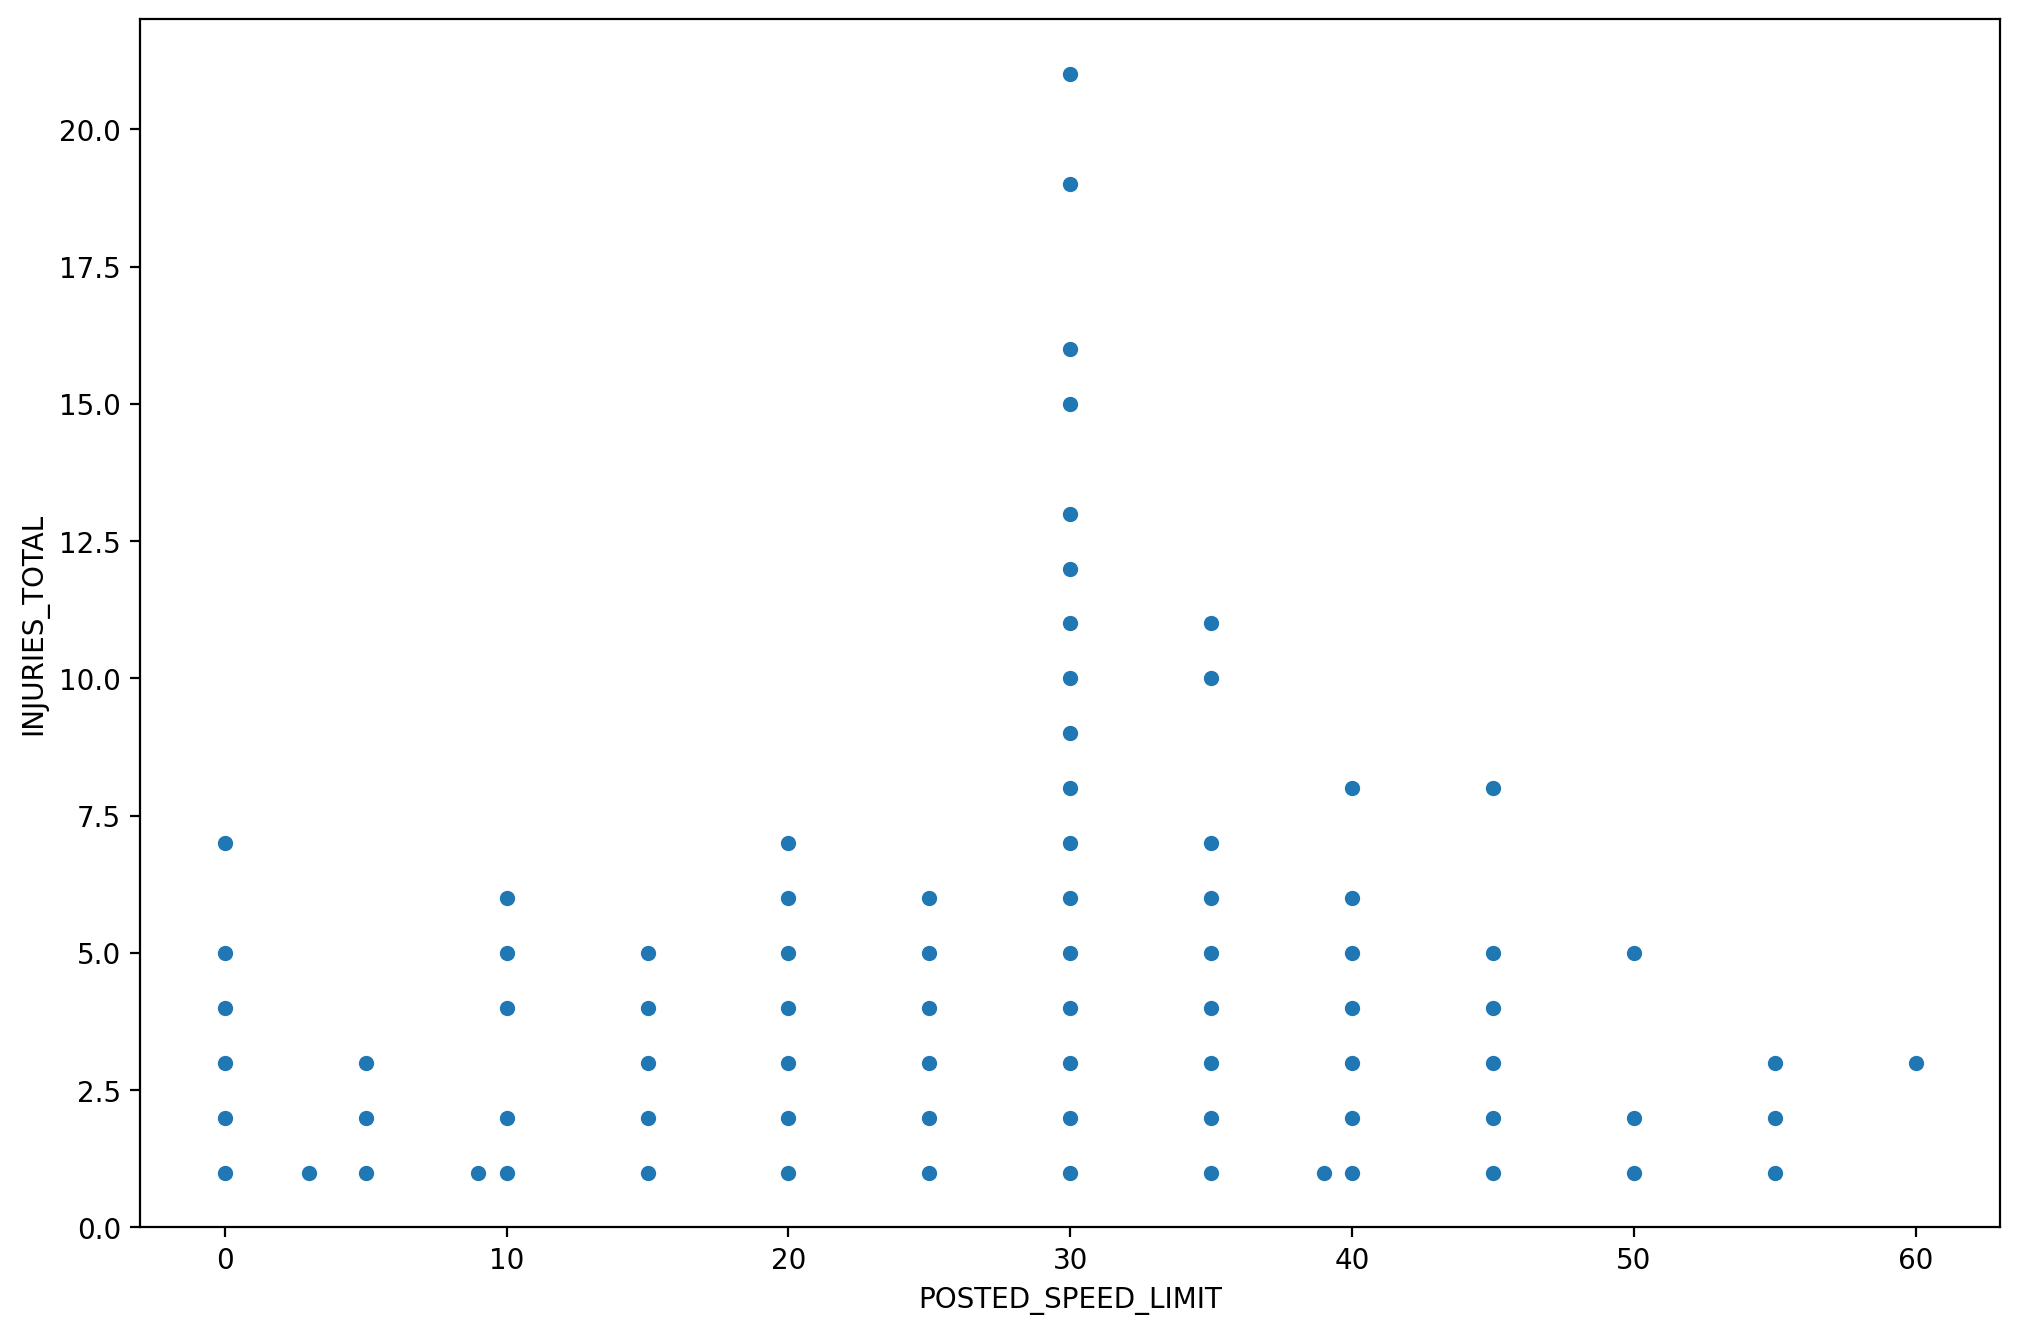

In [21]:
plt.figure(figsize=(12,8), dpi=200)

sns.scatterplot(x='POSTED_SPEED_LIMIT', y='INJURIES_TOTAL', data=df)

# Observation

This is a scatterplot between posted speed limit on the road where crash took place and the number of injuries suffered in the crash.

There seems to be no relation between posted speed limit on a road and number of injuries suffered in the traffic crashes.

This shows that accidents are spread accross all varieties of roads and not particular to certain speed limit roads

Though the maximum that we observe is for speed limit 30 

<AxesSubplot:xlabel='WEATHER_CONDITION', ylabel='count'>

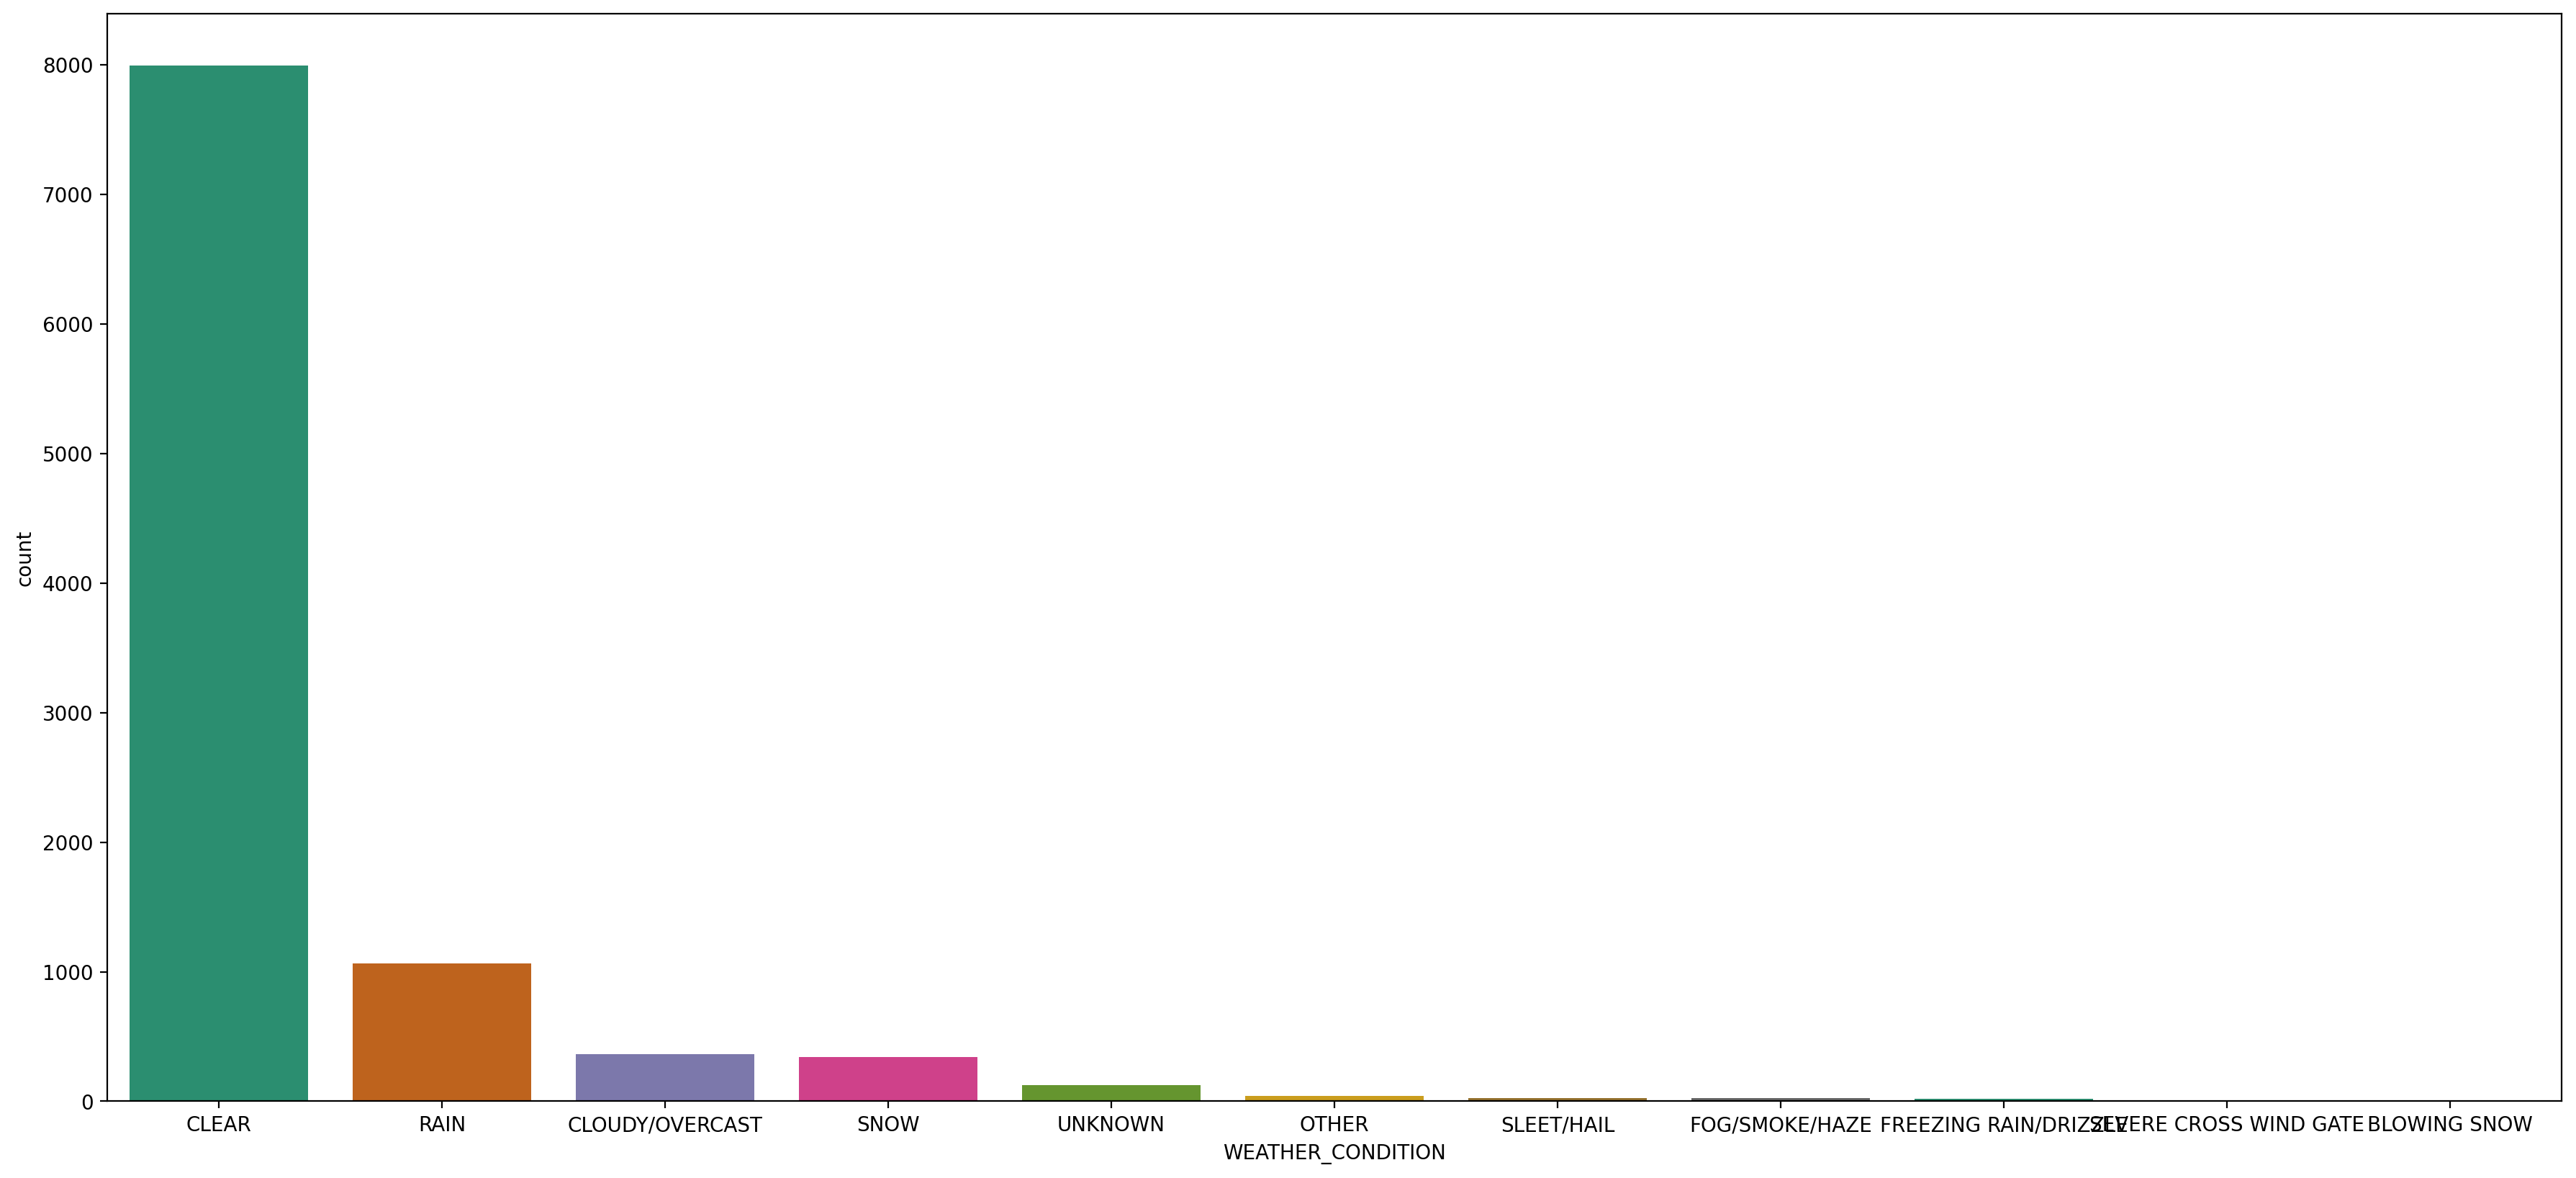

In [22]:
plt.figure(figsize=(22,10), dpi=200)
sns.countplot(data=df, x='WEATHER_CONDITION', palette='Dark2',
              order=df['WEATHER_CONDITION'].value_counts().index) #Setting descending order of the bars

# Observation

This graphs plot the count of crashes for every Weather Condition of the location when the crash took place

The majority of traffic crashes (approx 80%) take place in clear weather condition and there is drasatic uneven distribution of values among all the categories of weather condition.

<AxesSubplot:xlabel='LIGHTING_CONDITION', ylabel='count'>

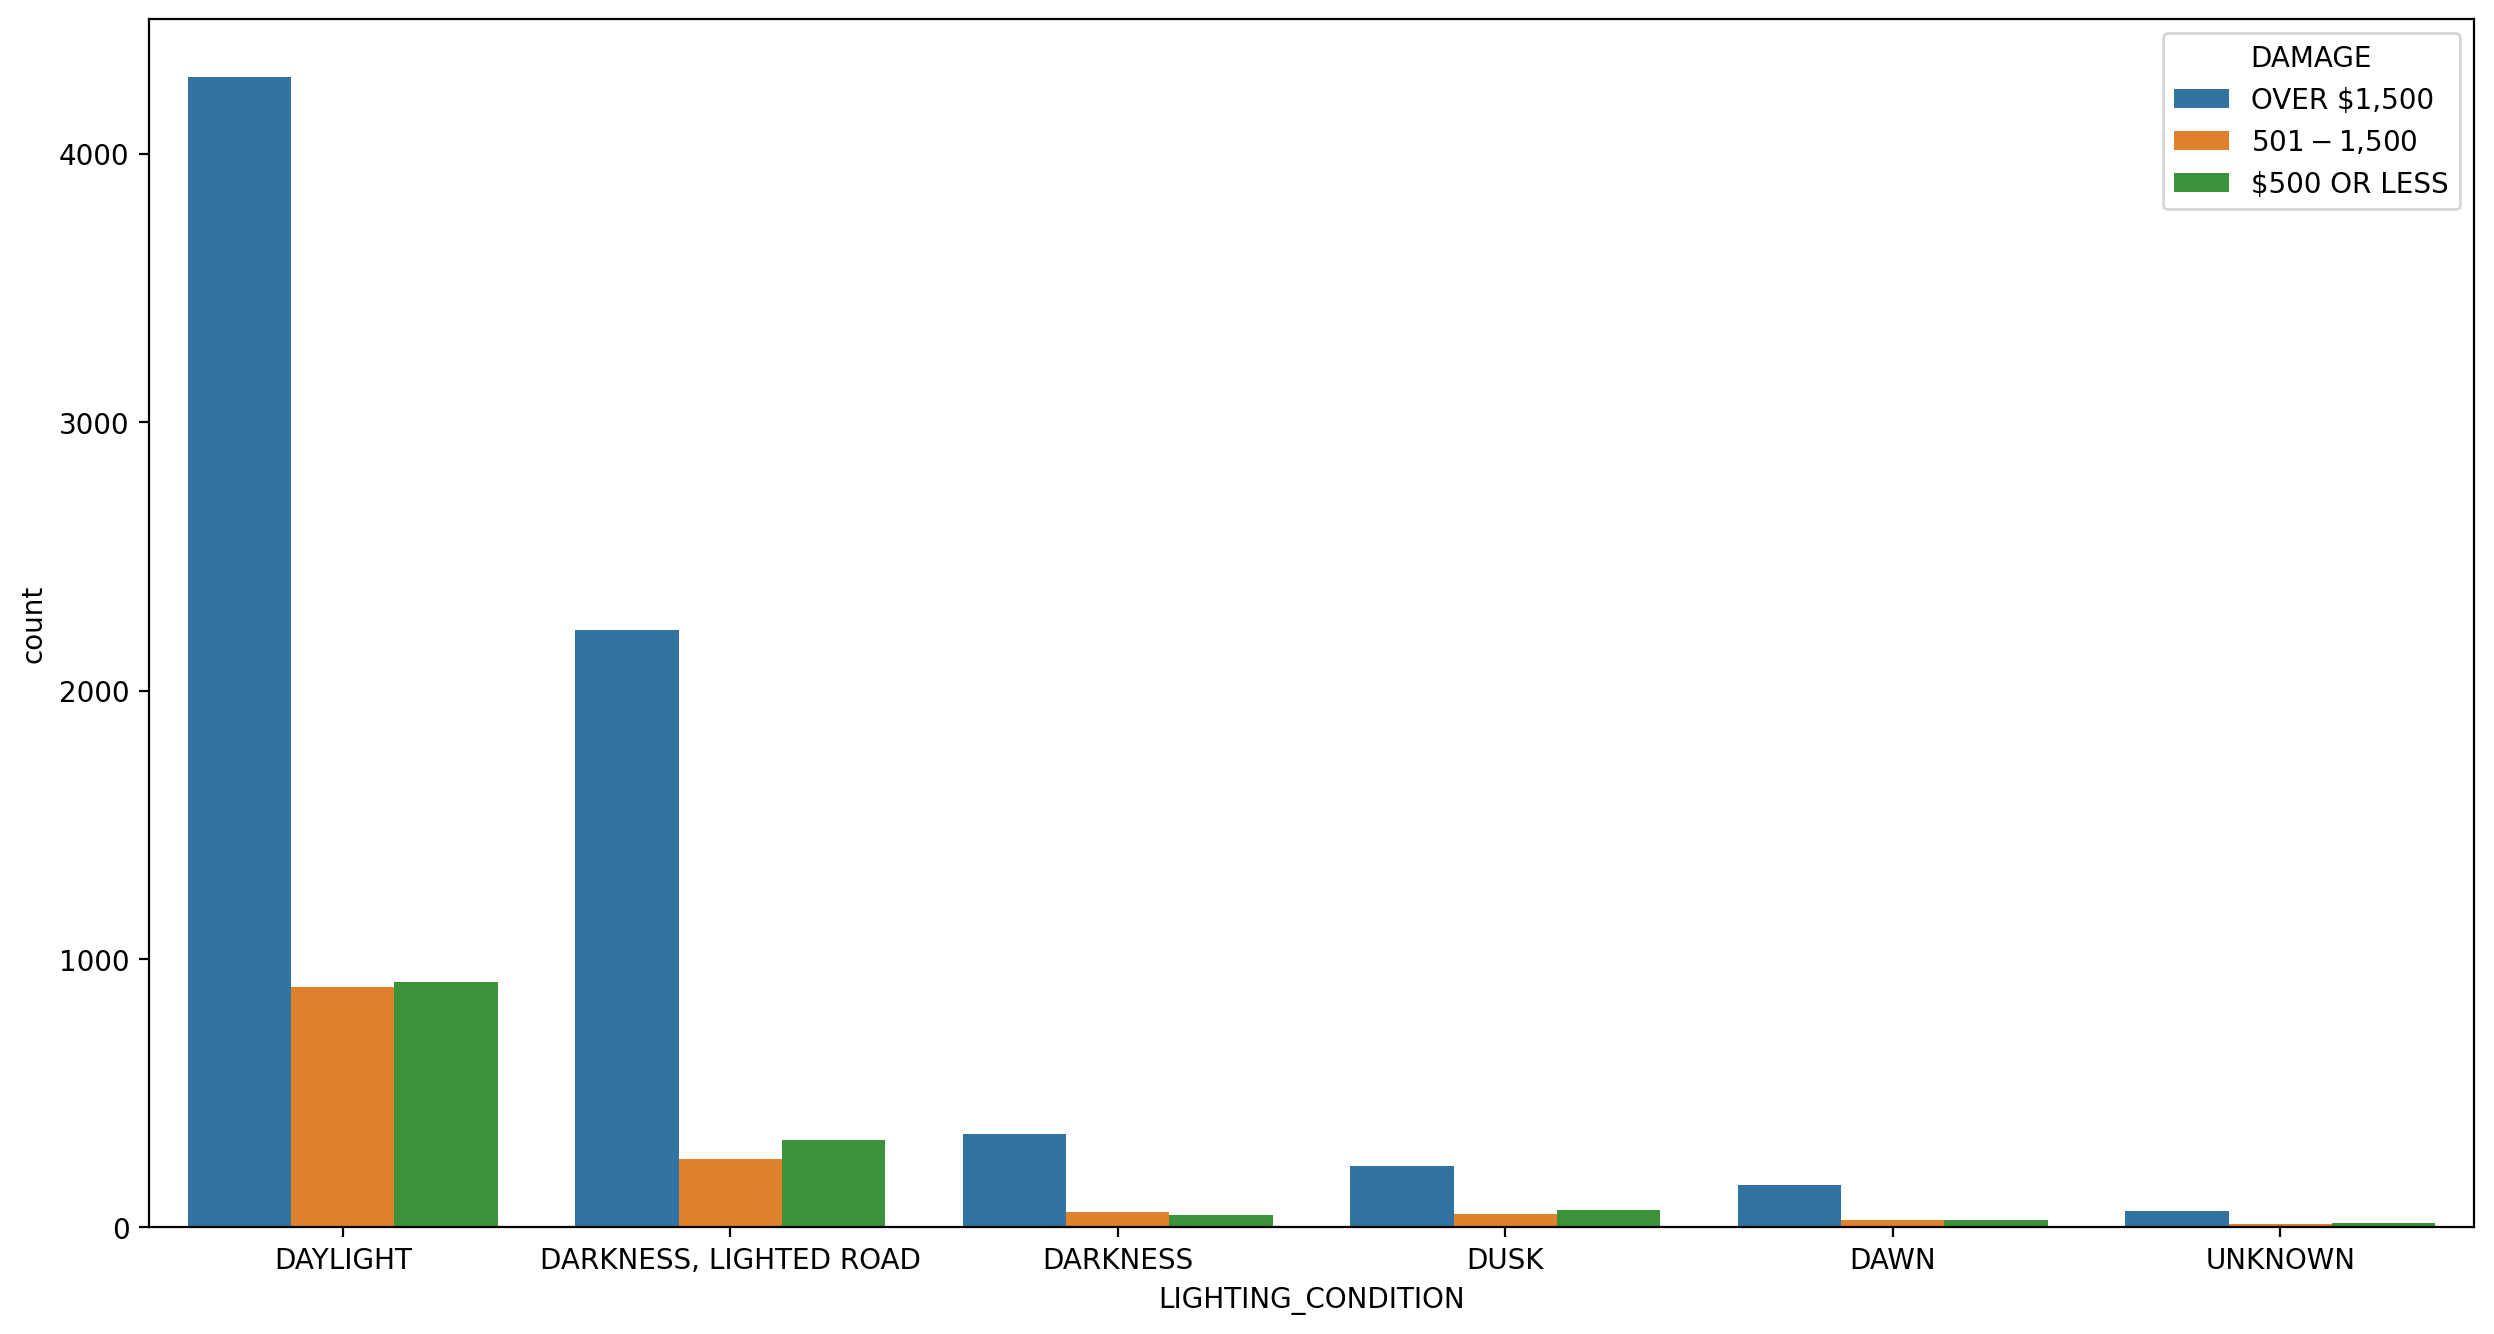

In [23]:
plt.figure(figsize=(15,8), dpi=200)

sns.countplot(data=df, x='LIGHTING_CONDITION', hue='DAMAGE',
             order=df['LIGHTING_CONDITION'].value_counts().index) #Setting descending order of the bars

# Observation

This graph plots crashes for every Lighting Condition of the road when the crash took place and is split into categories of Damage value caused to the receipient

Most crashes take place in the Daylight weather condition with majority having damage over $1500

<AxesSubplot:xlabel='Crash_Day', ylabel='INJURIES_TOTAL'>

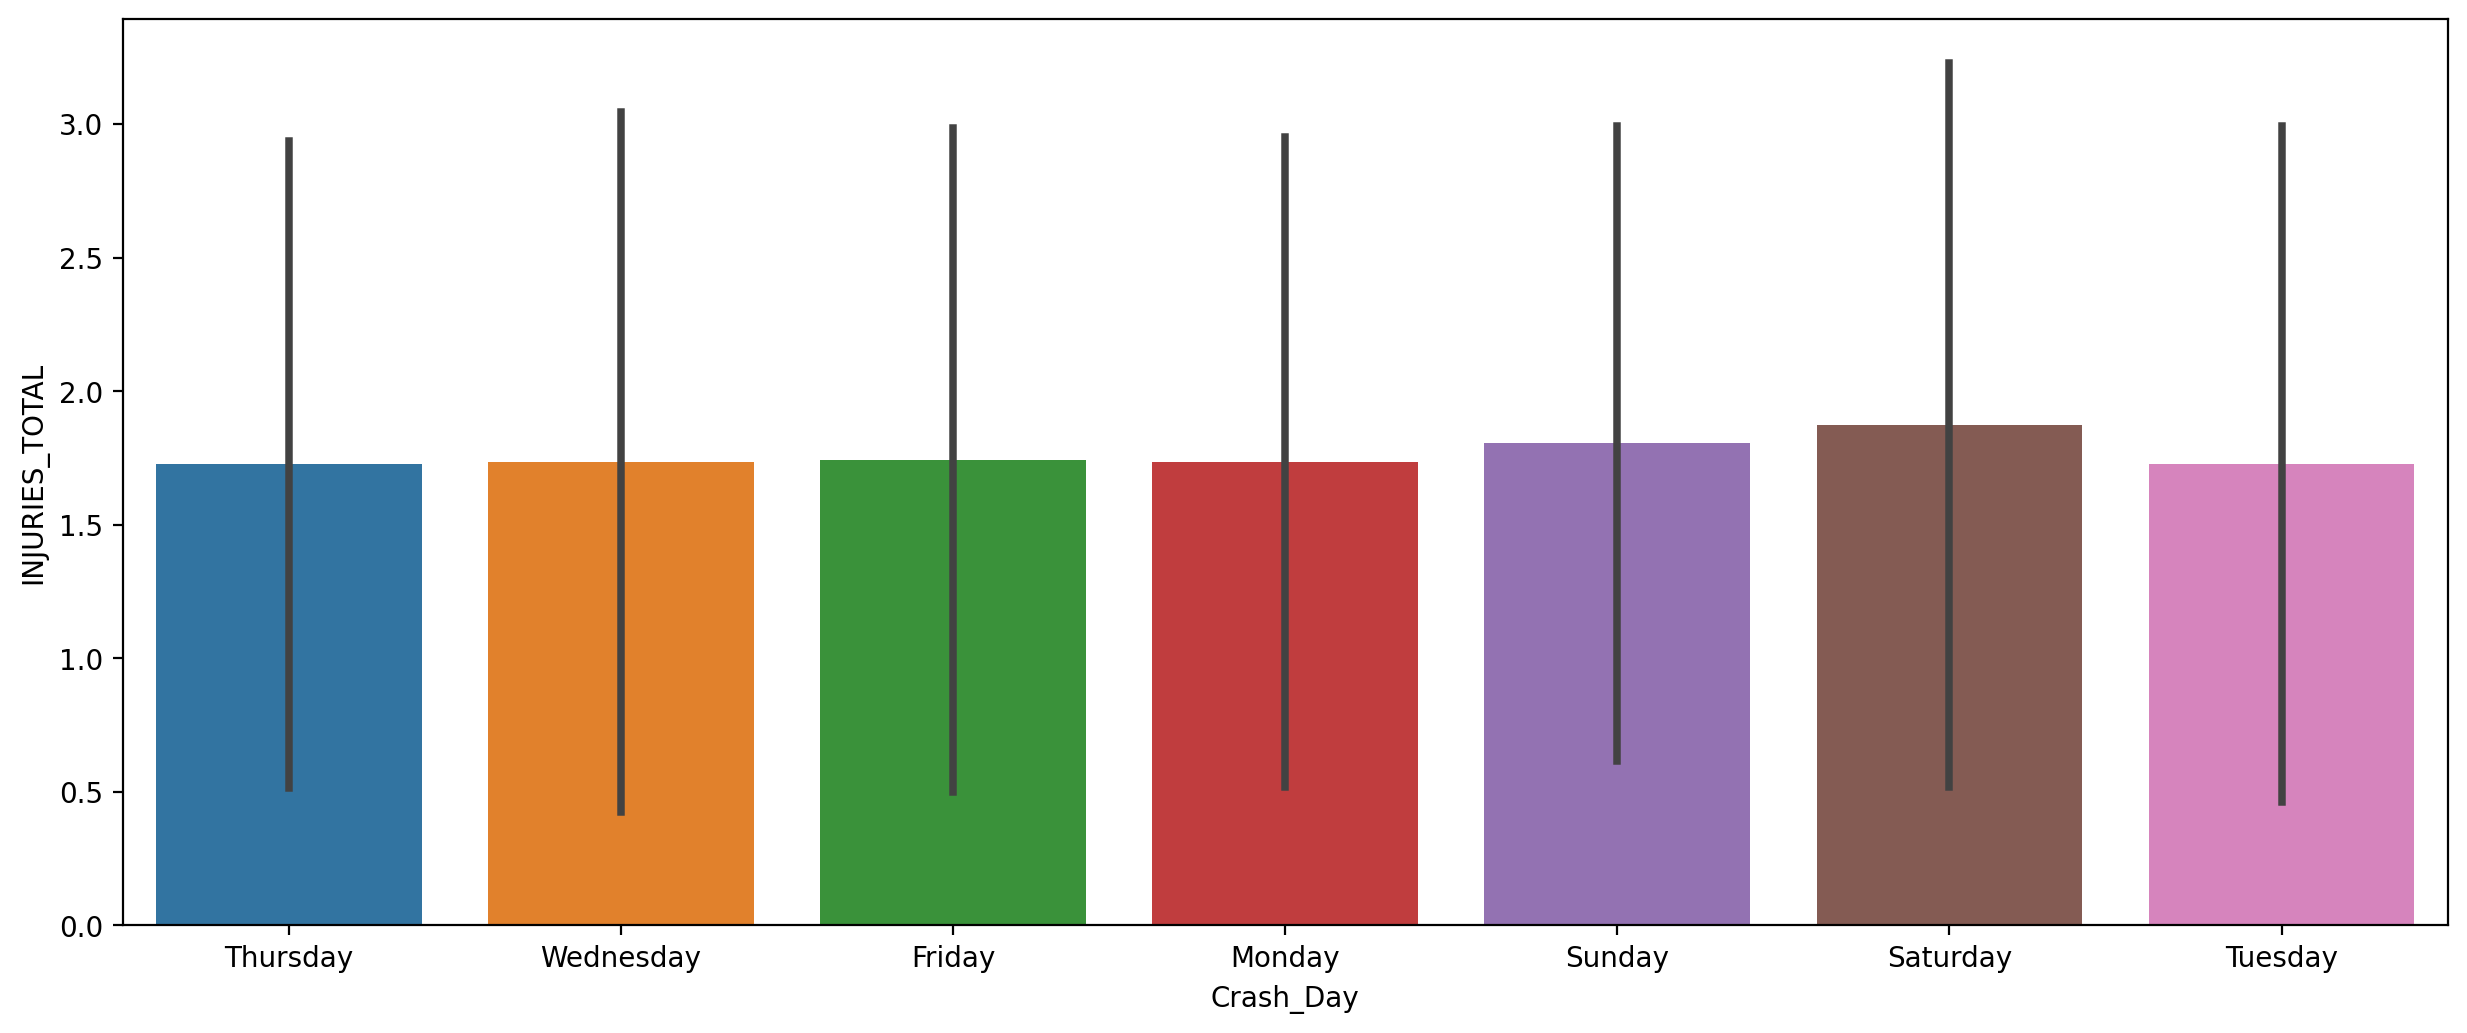

In [24]:
plt.figure(figsize=(15,6), dpi=200)

sns.barplot(data=df, x='Crash_Day', y='INJURIES_TOTAL', estimator=np.mean, ci='sd')

# Observation

This is the bar plot which visualizes mean number of injuries happened in the crashes on all the days of the week. The graph also plots a line of standard deviation which shows intensity of variation in the distribution of values.

While the total injuries are distributed almost equally among all days, Saturday has the highest mean total injuries
Also, Saturday has the highest standard deviation in the number of total injuries showing high variation in its distribution of total injuries

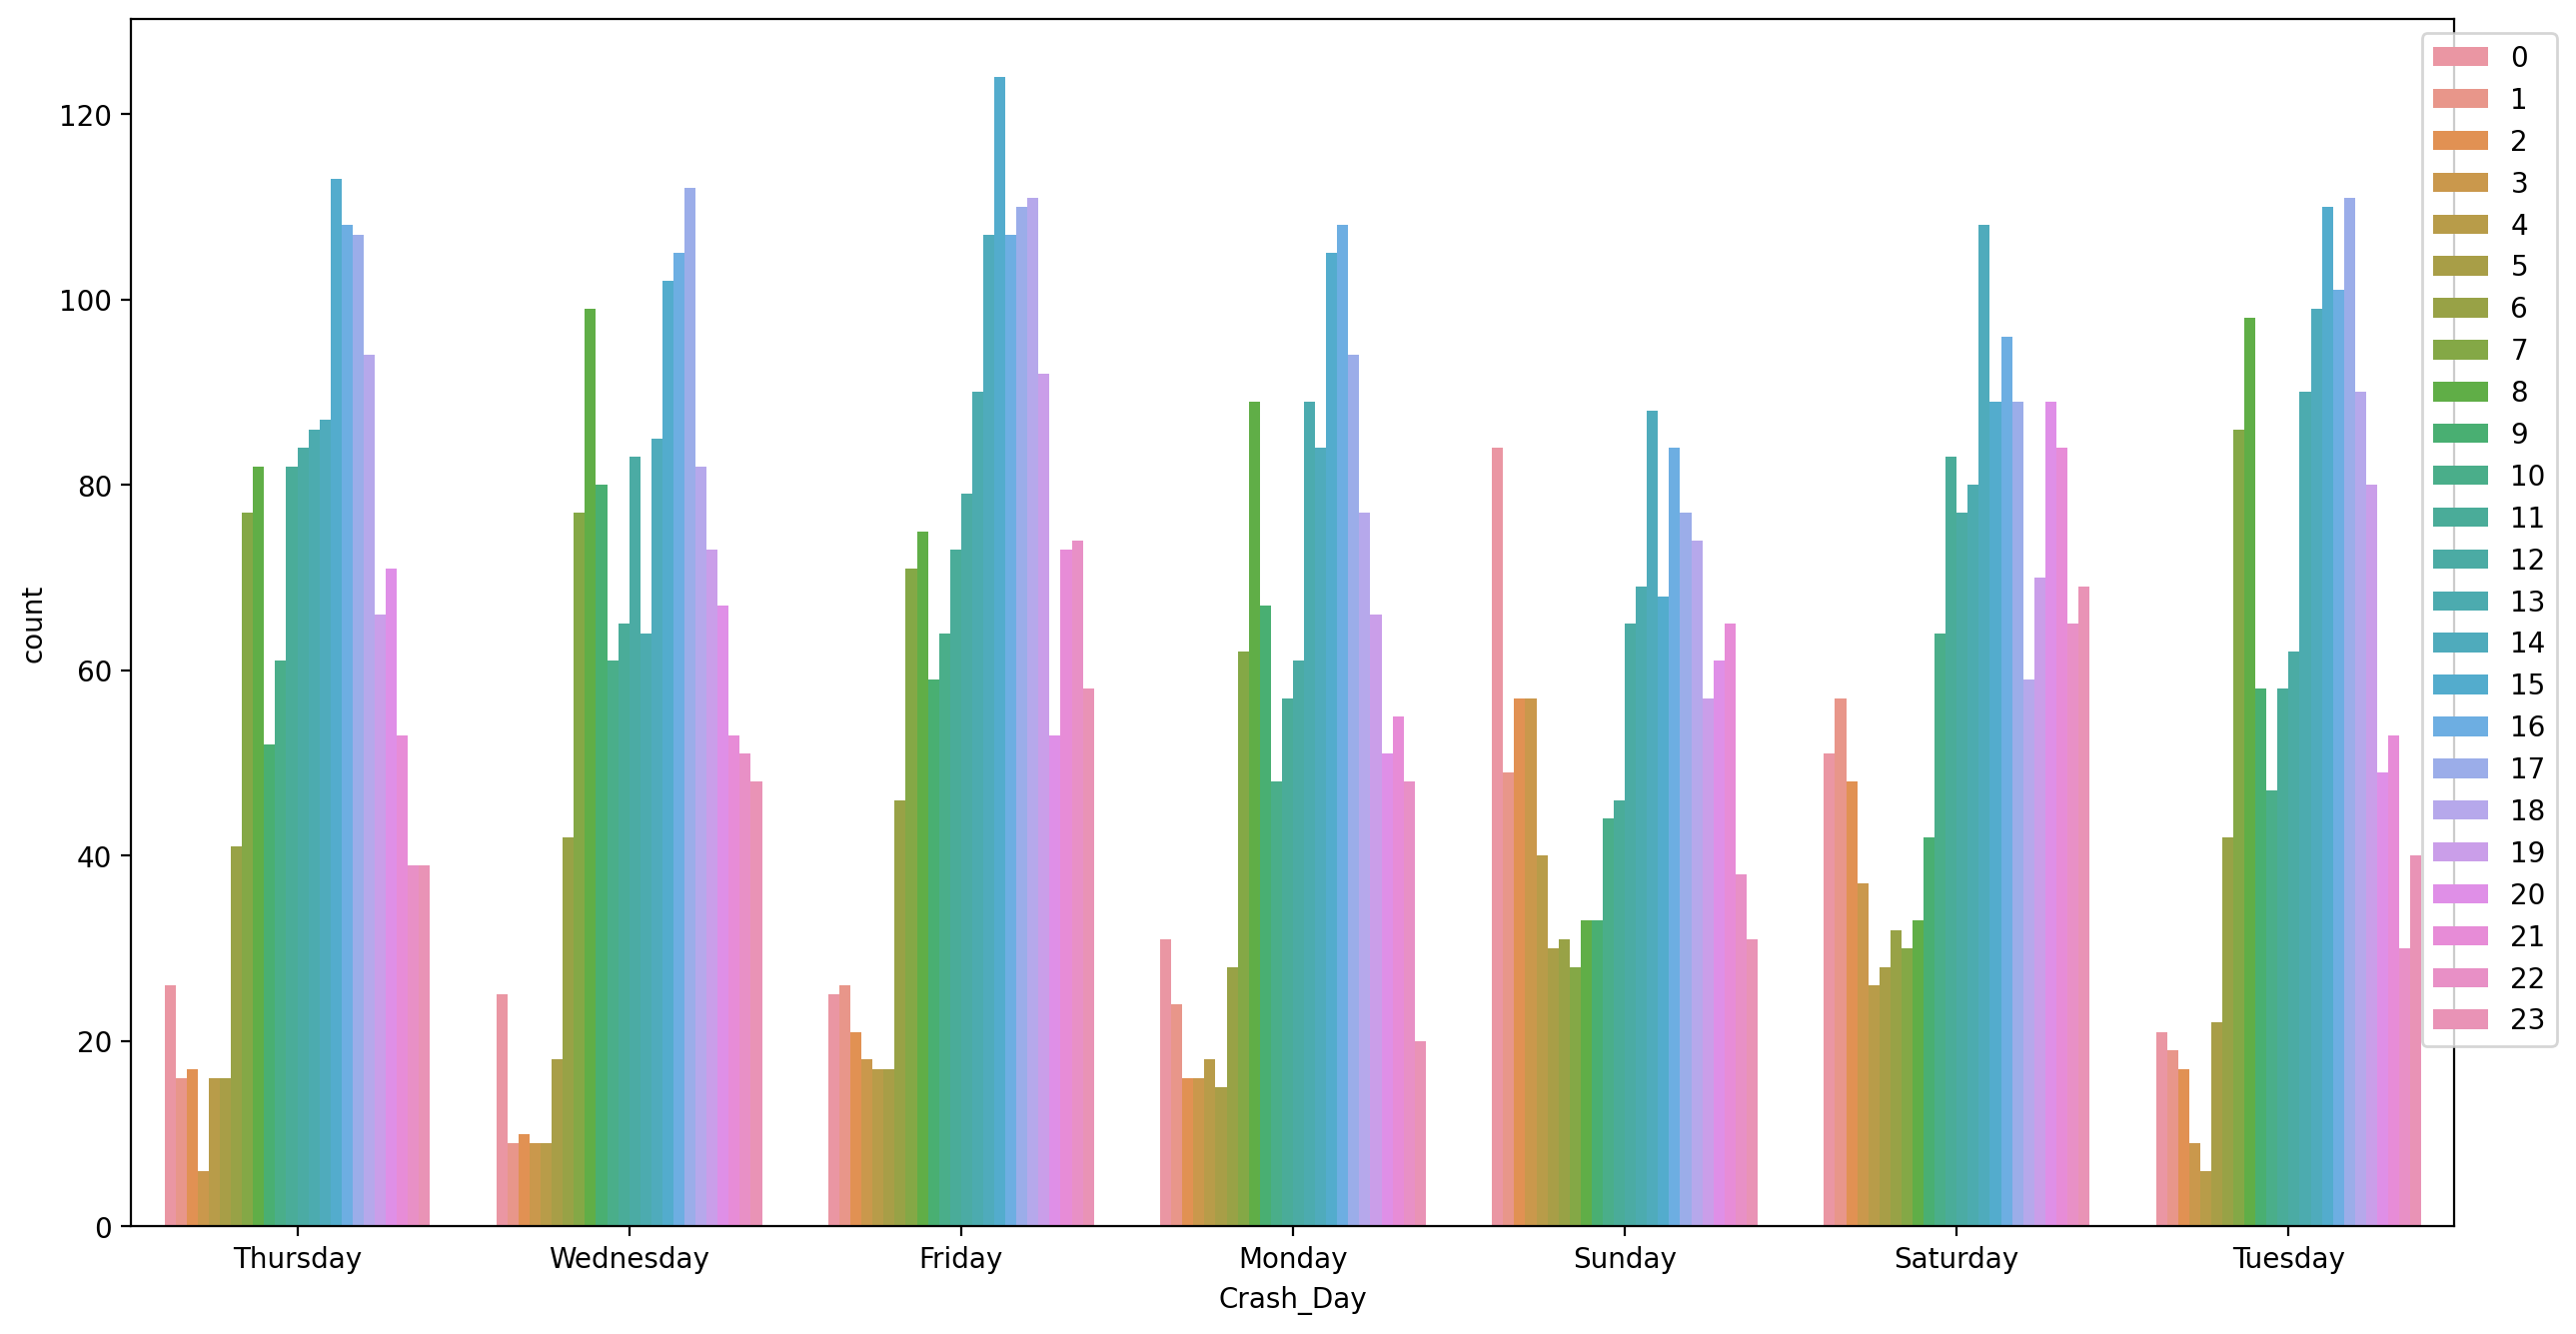

In [25]:
plt.figure(figsize=(15,8), dpi=200)
sns.countplot(data=df, x='Crash_Day', hue='CRASH_HOUR')
plt.legend(bbox_to_anchor = (1.05,1)) #placing legend outside the box

# Observation

In this graph we have plotted count of traffic crashes per day and for each hour in the day

Through the countplot we are able to plot the number of records (or traffic crashes) we have for each day and each hour
We are obervering that Friday has the maximum number of traffic crashes in the whole week. 

Also with time perspective we witness that the plot for all days peaks in the middle which shows that the traffic crashes are happening in noon (between 1100 hrs and 1300 hrs, ie: 11am and 1pm)

<AxesSubplot:xlabel='count', ylabel='TRAFFIC_CONTROL_DEVICE'>

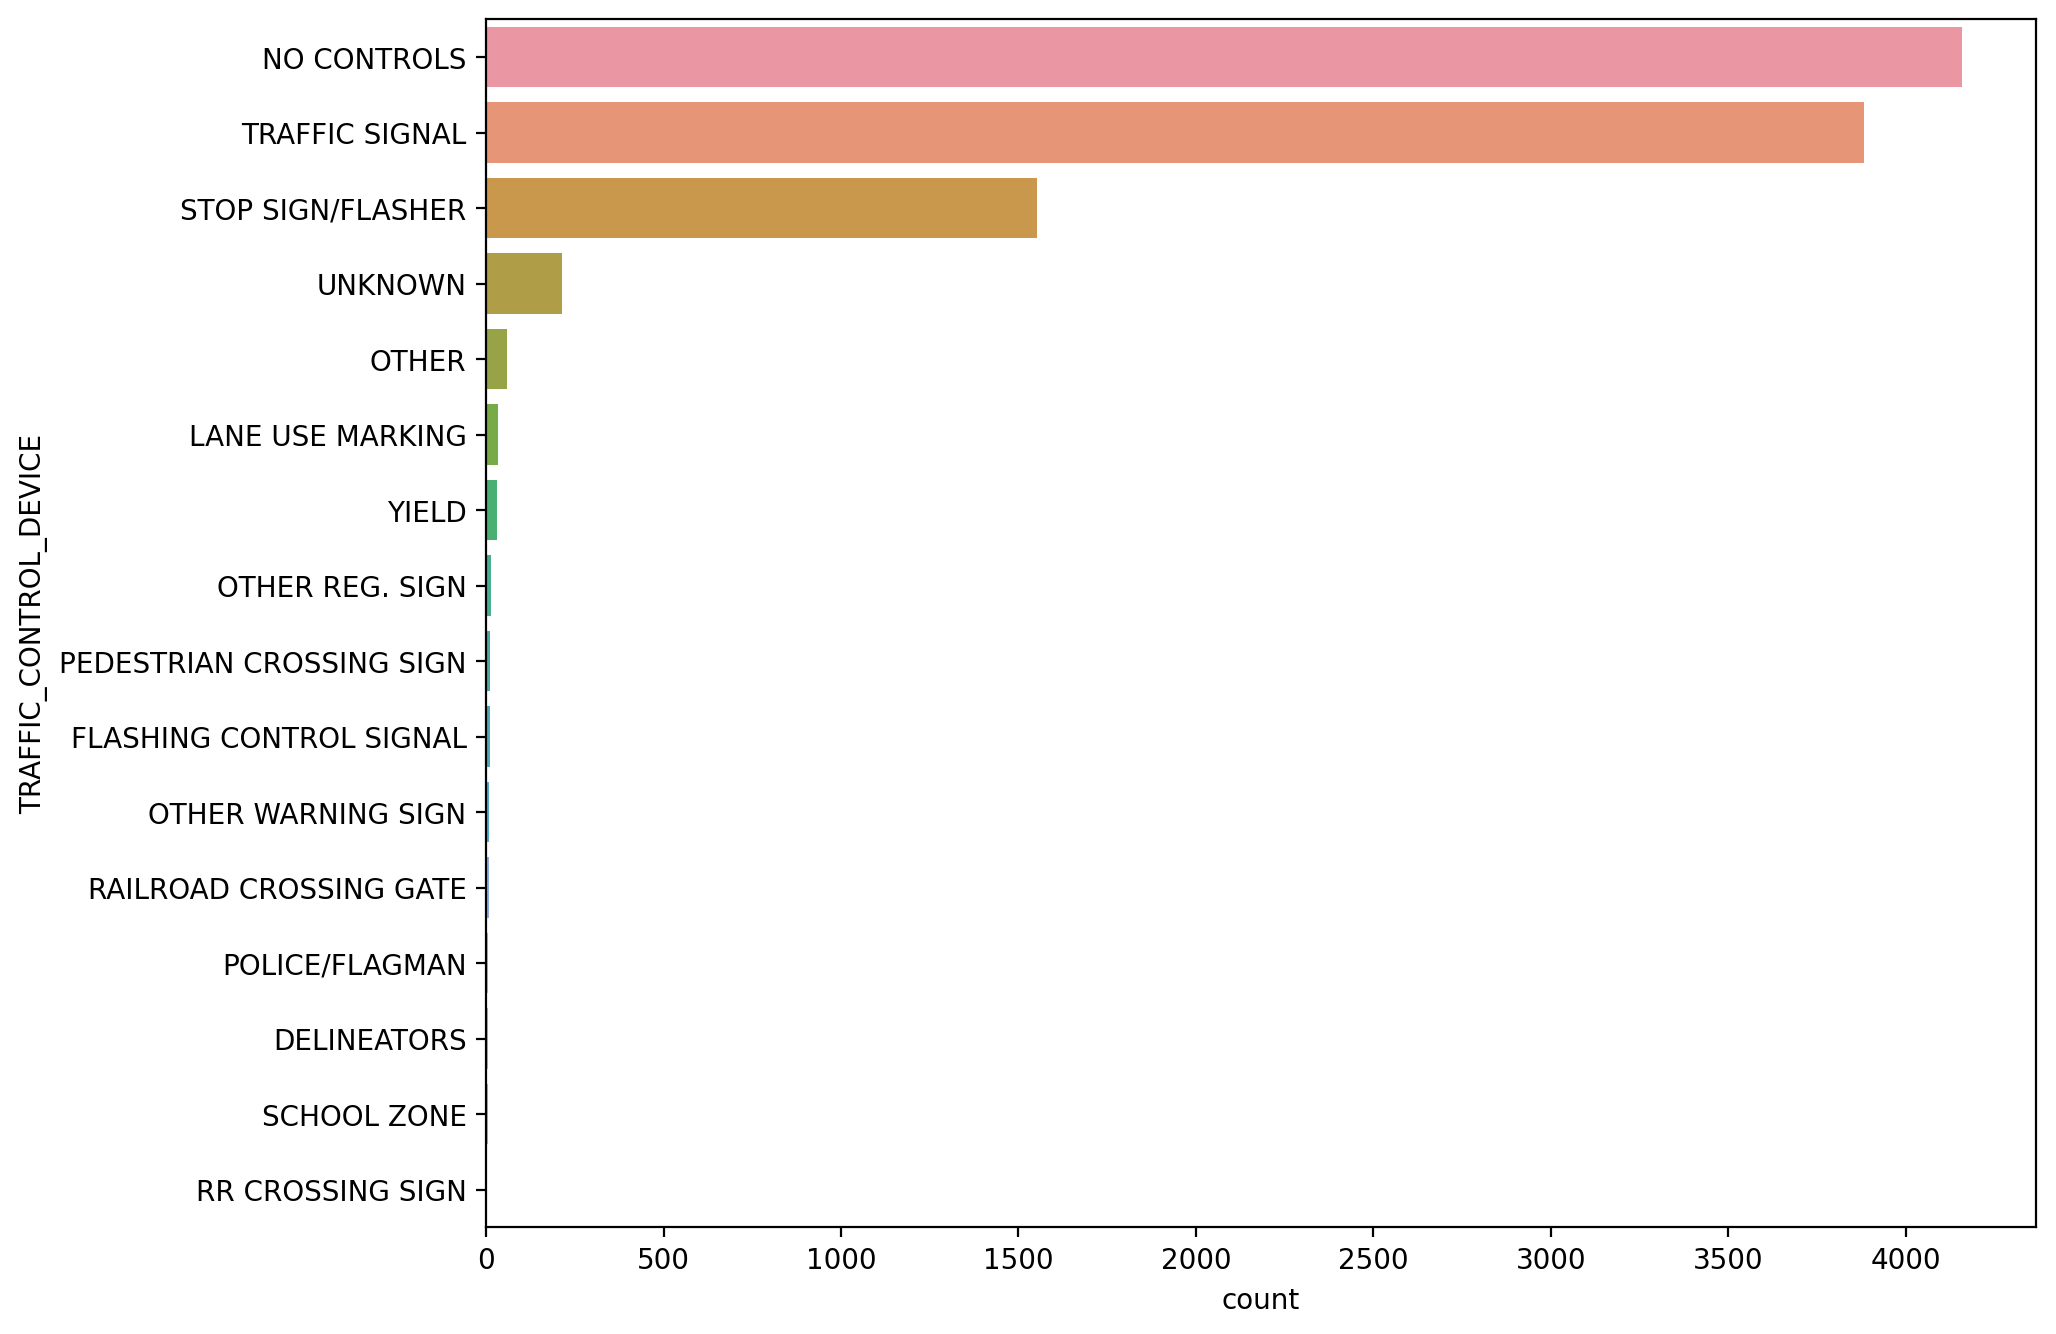

In [26]:
plt.figure(figsize=(10,8), dpi=200)
sns.countplot(data=df, y='TRAFFIC_CONTROL_DEVICE', 
              order=df['TRAFFIC_CONTROL_DEVICE'].value_counts().index) #Setting descending order of the bars

# Observation

We have plotted the type of control device installed on the road where the crash took place.

We witness here that near about 4000 traffic crashes had no traffic control device installed on the road which could be a major reason for crashes 

<AxesSubplot:xlabel='DEVICE_CONDITION', ylabel='count'>

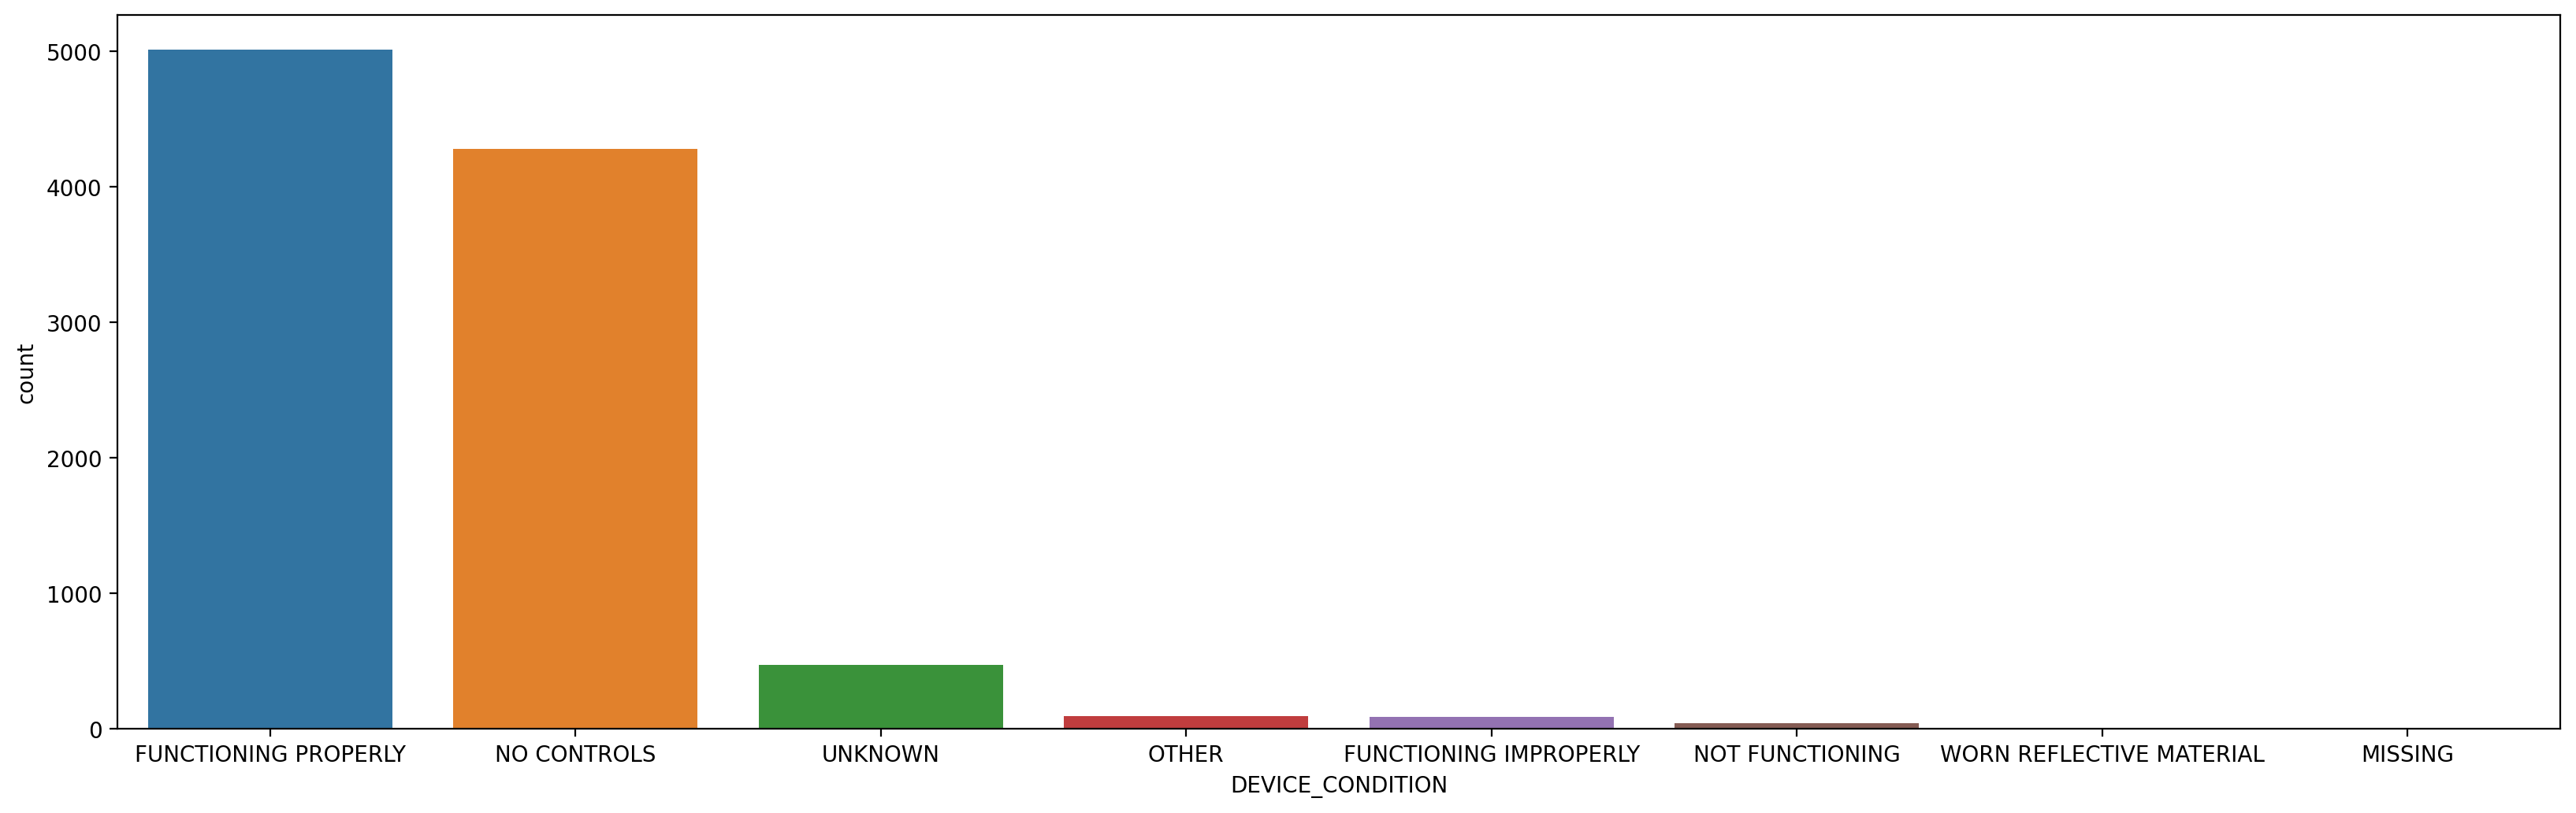

In [27]:
plt.figure(figsize=(20,6), dpi=200)
sns.countplot(data=df, x='DEVICE_CONDITION', 
             order=df['DEVICE_CONDITION'].value_counts().index) #Setting descending order of the bars

# Observation

We have plotted the frequency distribution of condition of the traffic control device  installed on the crash location

This count plot also validates the fact that device condition doesn't affect much of the accidents, but roads with no controls is a significant contributor to the number of traffic crashes

<AxesSubplot:xlabel='count', ylabel='FIRST_CRASH_TYPE'>

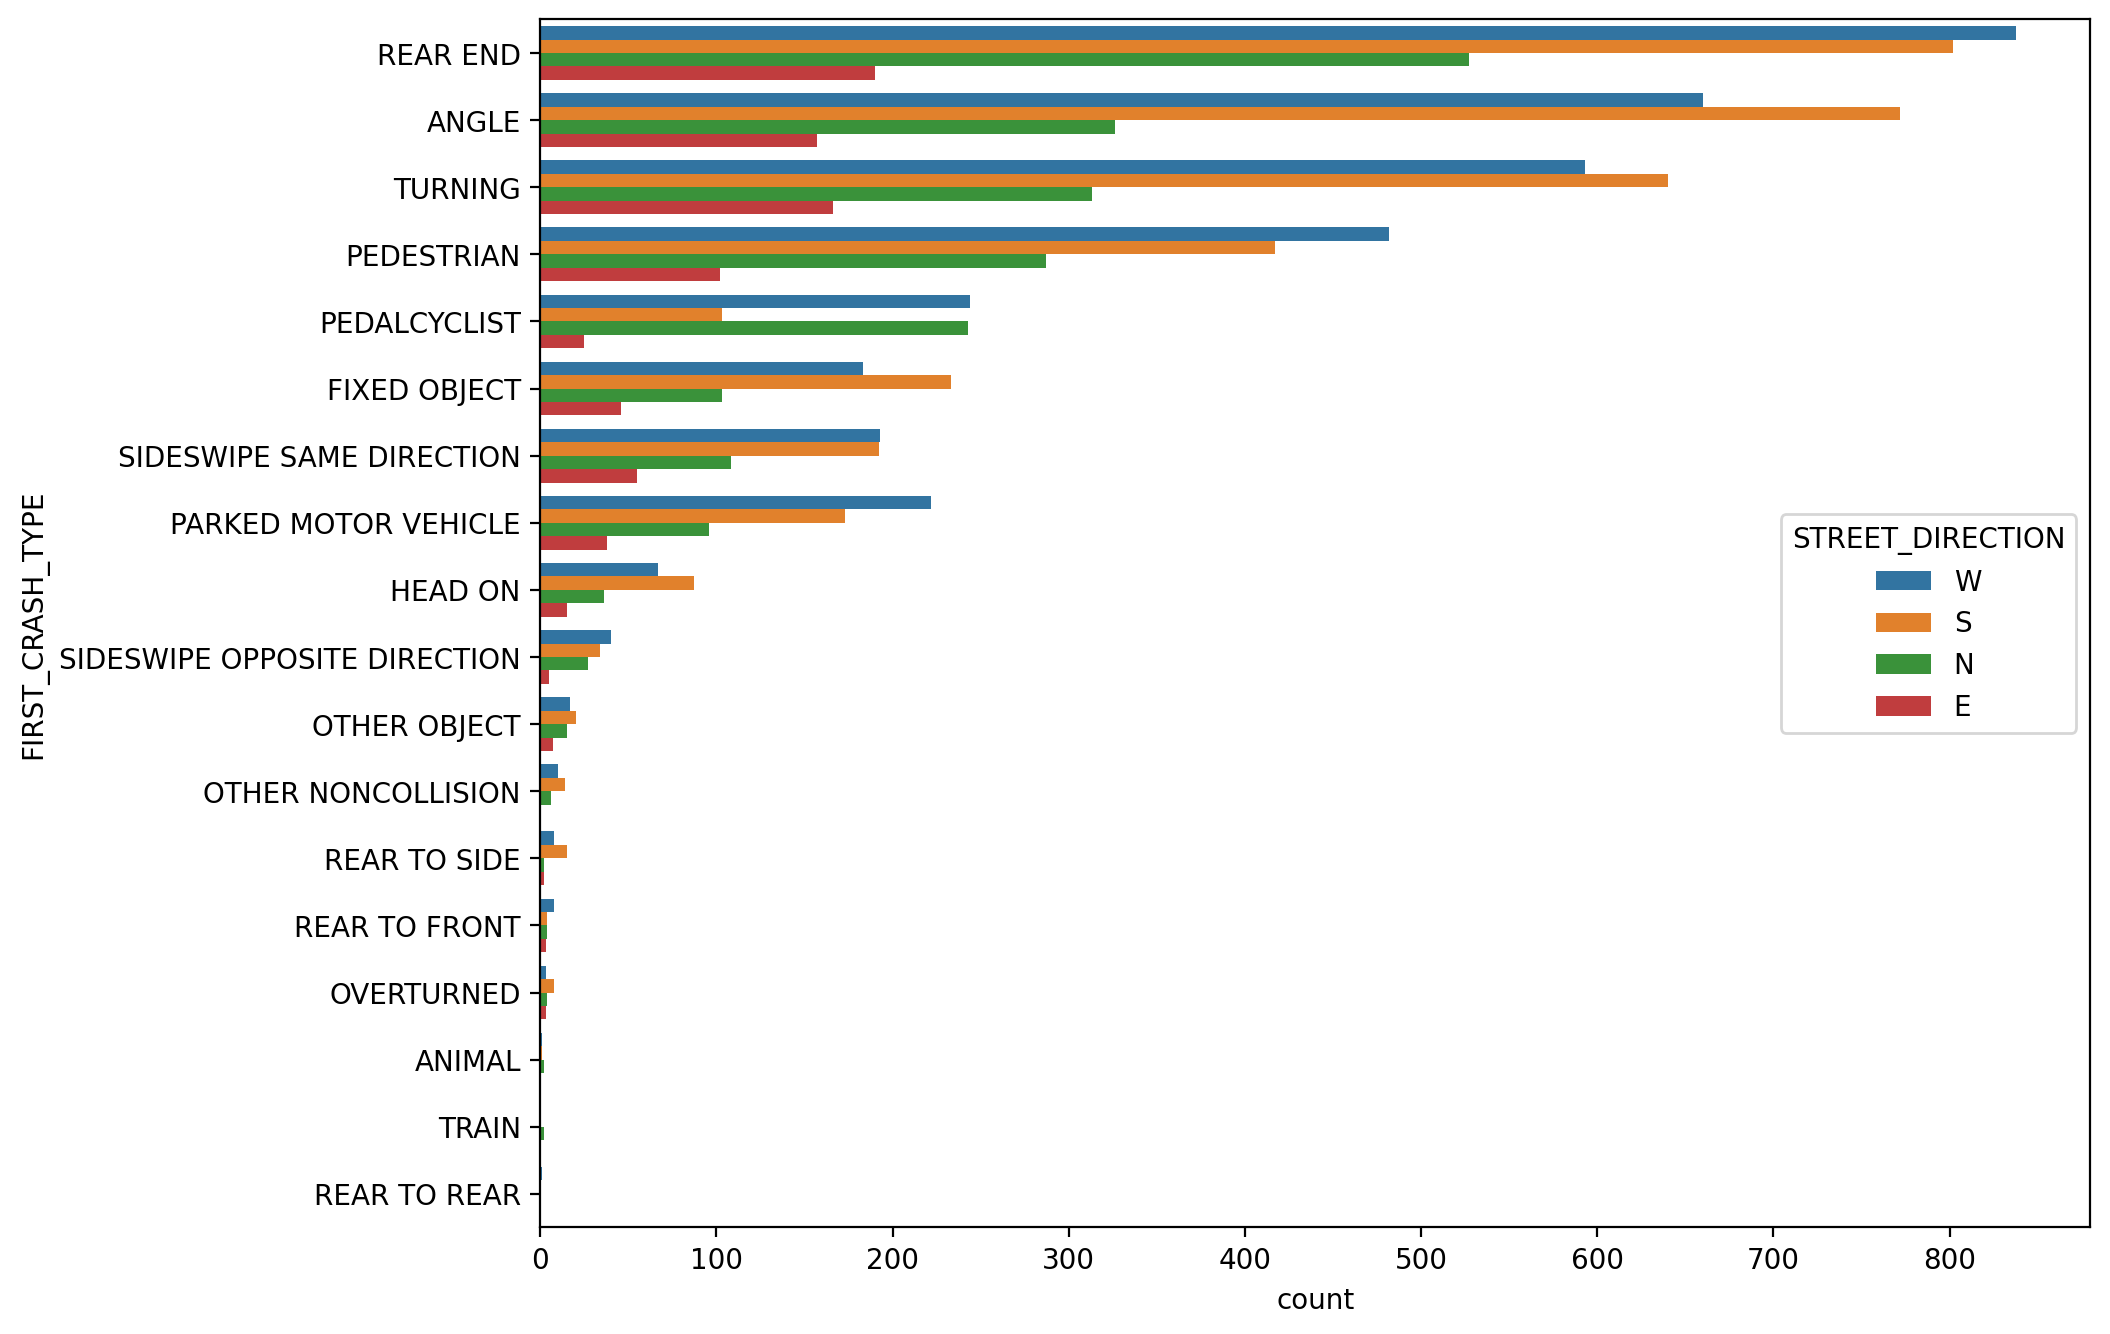

In [28]:
plt.figure(figsize=(10,8), dpi=200)

sns.countplot(data=df, y='FIRST_CRASH_TYPE', hue='STREET_DIRECTION',
             order=df['FIRST_CRASH_TYPE'].value_counts().index) #Setting descending order of the bars

# Observation

Through this plot we are looking at frquency distribution of category of crash types as provided by the field officer.
We can observe that rear end crashes are the most prevalent. 

We have also added the street address direction where the crash took place and it can be witnessed that West and South bound directions have the most crashes amongs all the categories

<AxesSubplot:xlabel='DAMAGE', ylabel='INJURIES_TOTAL'>

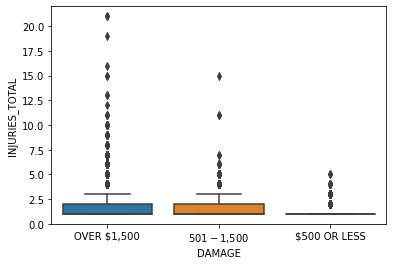

In [29]:
sns.boxplot(data=df,  y='INJURIES_TOTAL', x='DAMAGE')

# Observation

The box plot visualizes distribution of number of injuries for each damage type. For traffic crashes having damage over $1500, the injuries are between 0 to 2 with a lot of outliers which shows that more number of injuries is usually a rarity

The damage between 500 to 1500 has also the same distribution with fewer outliers 

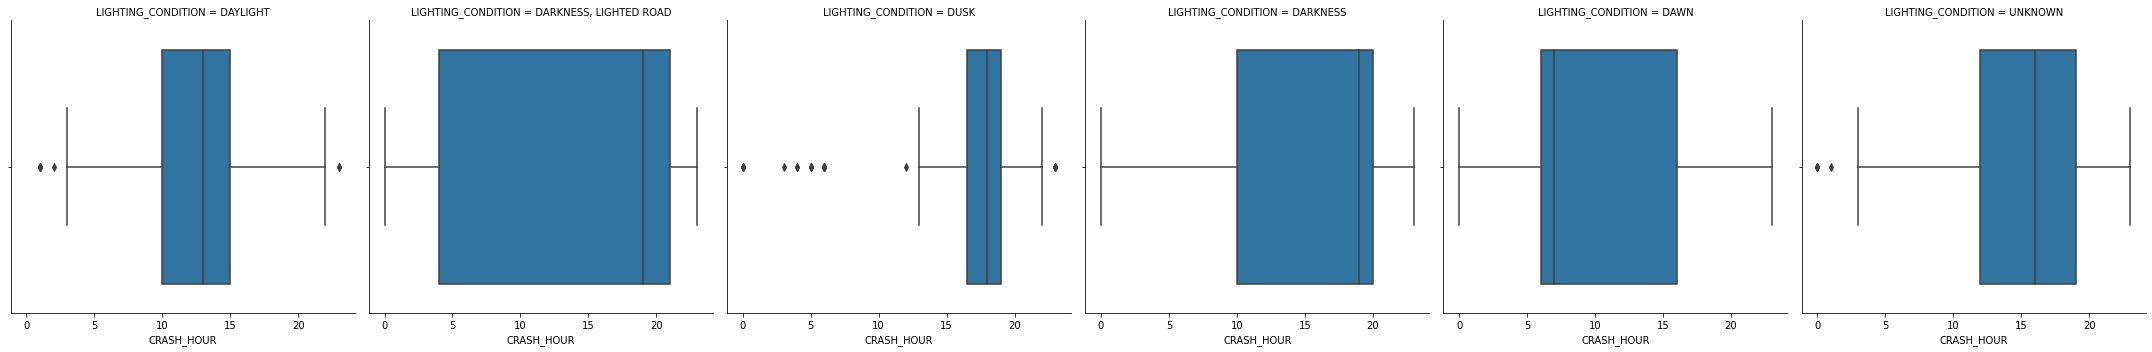

In [30]:
sns.catplot(data=df, x='CRASH_HOUR', col='LIGHTING_CONDITION'
            , kind='box')

# Observation

The box plot lets us distinguish more specifically how crashes are distributed along the hours of the day for every lightning condition. We could observe a discrepancy at lightning condition is darkness as the hours range from 10 am to 8 pm which majorly is daylight time and there is no darkness in the lighting condition during those hours.

<AxesSubplot:xlabel='count', ylabel='PRIM_CONTRIBUTORY_CAUSE'>

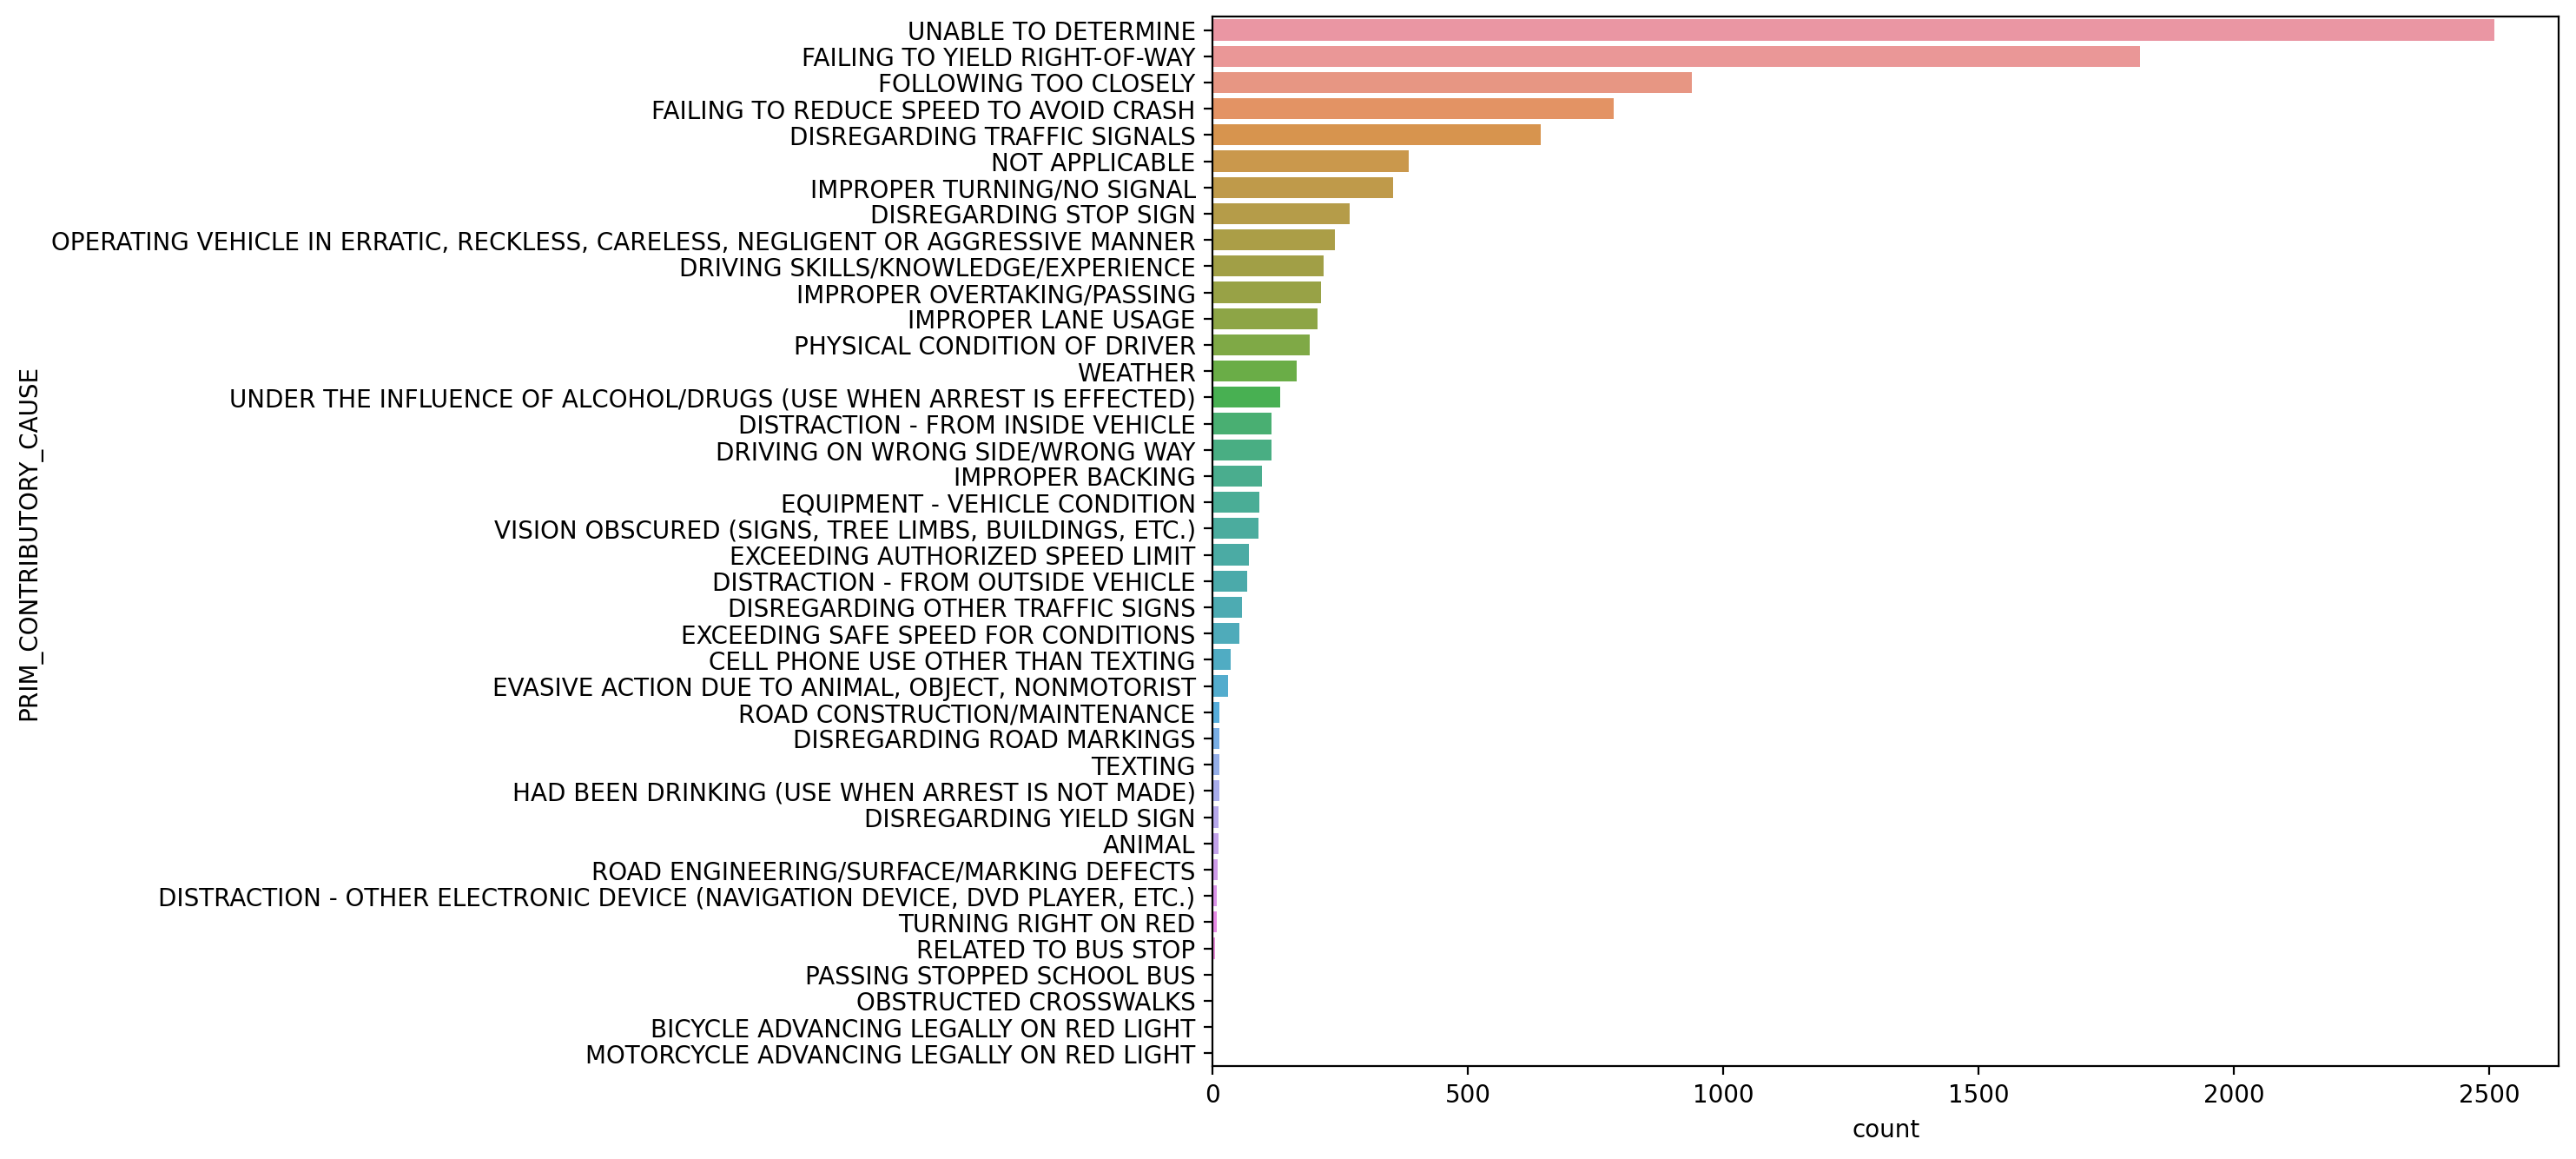

In [31]:
plt.figure(figsize=(10,8), dpi=200)

sns.countplot(data=df, y='PRIM_CONTRIBUTORY_CAUSE',  
              order=df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index) #Setting descending order of the bars


# Observation

We are visualizing frequency distribution of the primary cause of the crash as reported by the field officer.

A lot of data is tagged as Unable to Determine as a primary cause of the crash. While, apart from that we see that 'Failing to Yield Right of the Way' is the most common cause of the crash and comprising close to 20% of the all the crashes under study.

D:\Uwinnipeg\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='NUM_UNITS', ylabel='Density'>

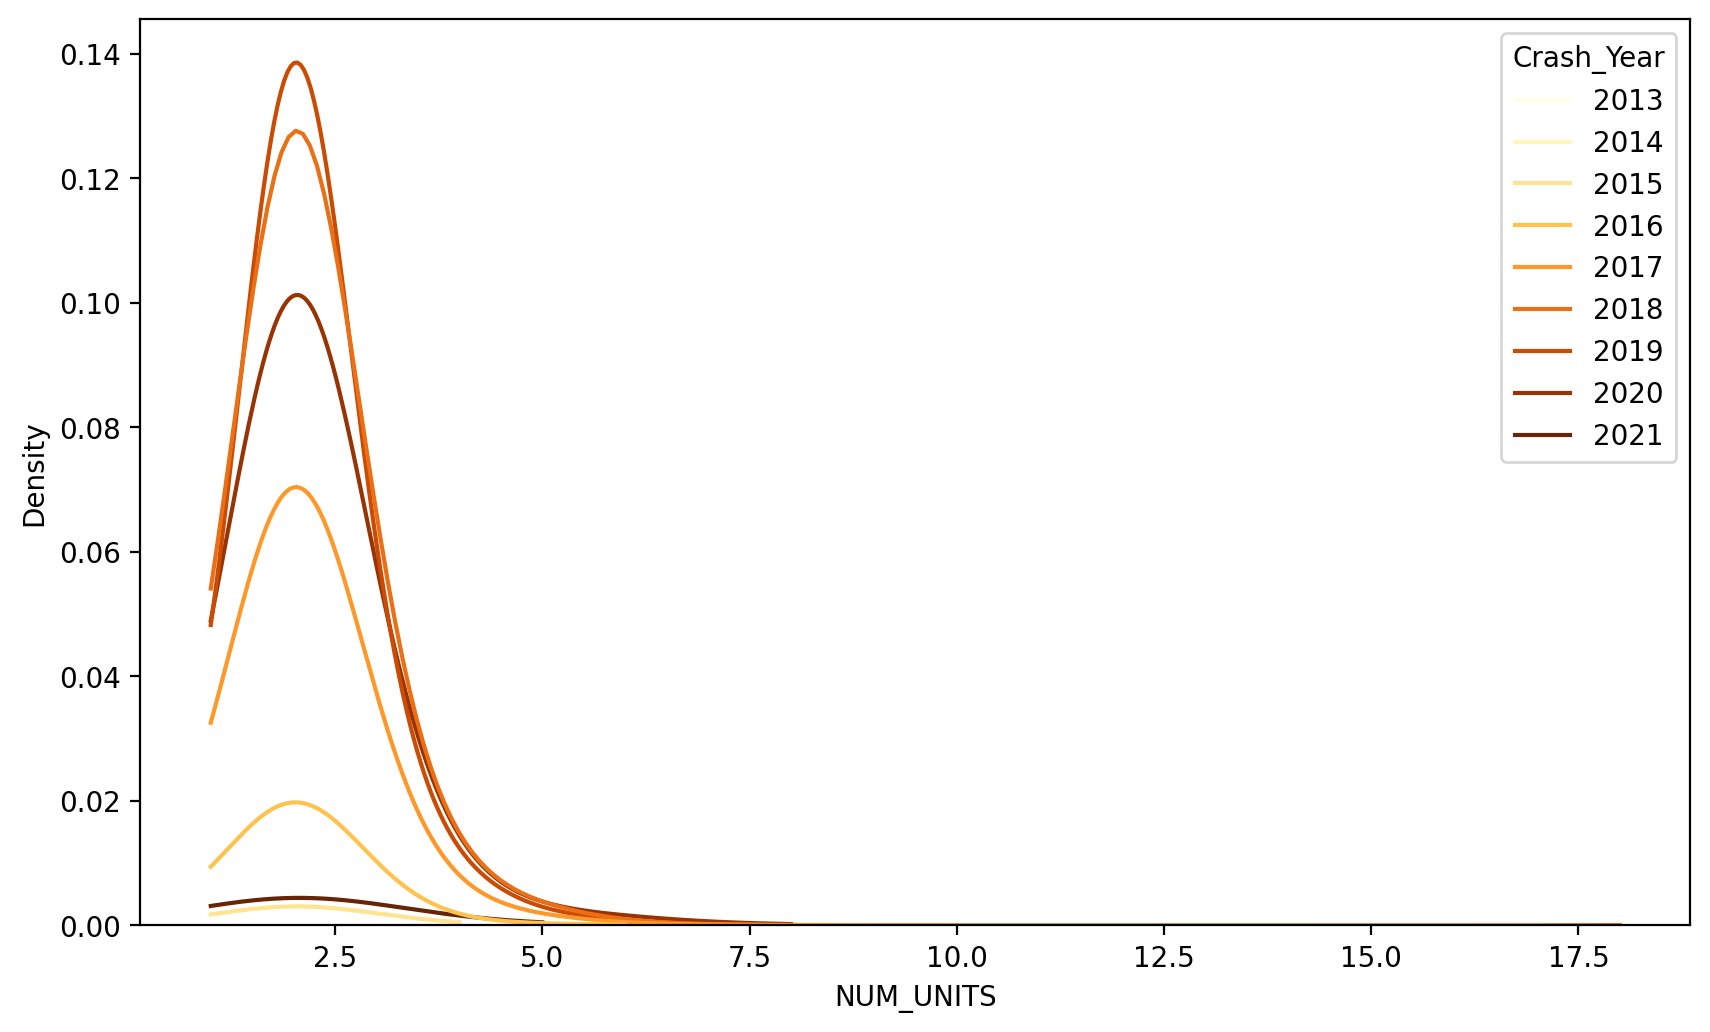

In [32]:
plt.figure(figsize=(10,6), dpi=200)

sns.kdeplot(data=df, x='NUM_UNITS',hue='Crash_Year', palette='YlOrBr' , bw_adjust=5, cut=0)

# Observation

This plot visualizes distribution of number of units (vehicles) invloved in the traffic crashes and we have categorized them for different years. Earlier years have been assigned lighter shade and later years are darker in color. 

Overall we see there is rise in kurtosis as the year progresses which shows that the graph is more peaked towards the value of 2 with higher proabilities over time.

The graph is also becoming more and more right skewed as the years go by which shows that crashes involving higher number of vehicles has started occuring over later years. Since the probability of having higher number of vehicles crashing is low, the curve is right skewed

In [221]:
# Importing traffic crashes people dataset 
# The dataset contains details about the people who were invloved in those above traffic crashes

df_people_main = pd.read_csv('Traffic_Crashes_-_People.csv', low_memory=False, parse_dates=[5])

In [222]:
df_people_main.head().transpose()

,0,1,2,3,4
PERSON_ID,O749947,O871921,O10018,O10038,O10039
PERSON_TYPE,DRIVER,DRIVER,DRIVER,DRIVER,DRIVER
CRASH_RECORD_ID,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...
RD_NO,JC451435,JD208731,HY484534,HY484750,HY484778
VEHICLE_ID,834816.0,827212.0,9579.0,9598.0,9600.0
CRASH_DATE,2019-09-28 03:30:00,2020-04-13 22:50:00,2015-11-01 05:00:00,2015-11-01 08:00:00,2015-11-01 10:15:00
SEAT_NO,NaN,NaN,NaN,NaN,NaN
CITY,CHICAGO,CHICAGO,NaN,NaN,NaN
STATE,IL,IL,NaN,NaN,NaN
ZIPCODE,60651,60620,NaN,NaN,NaN


In [223]:
# The main dataset contains 1303467 obervations 
# But we are only interested in the 10,000 crashes that we sampled in traffic crashes dataset

df_people_main.shape

(1303467, 30)

In [224]:
# Filtering out observations that match with the crash_record_id of from our traffic_crashes dataset
# Creating a new dataframe with the matches records
#Created a inner join between crash_record_id of traffic crashes data and traffic crash people dataset

df_people = pd.merge(df['CRASH_RECORD_ID'],df_people_main,how='inner',on='CRASH_RECORD_ID')

In [225]:
# Dataframe df_people is the sample set of the traffic crashes people dataset 
# Every record in df_people dataframe macthes with the crash record id of traffic crashes dataset

df_people

,CRASH_RECORD_ID,PERSON_ID,PERSON_TYPE,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,O800482,DRIVER,JC543901,760147.0,2019-12-12 09:43:00,NaN,CHICAGO,IL,60625,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,"TEST PERFORMED, RESULTS UNKNOWN",NaN,NaN
1,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,O800483,DRIVER,JC543901,760157.0,2019-12-12 09:43:00,NaN,CHICAGO,IL,60632,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,O565653,DRIVER,JC119409,539559.0,2019-01-16 16:15:00,NaN,CHICAGO,IL,60622,...,NaN,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,O565654,DRIVER,JC119409,539560.0,2019-01-16 16:15:00,NaN,CHICAGO,IL,60651,...,NaN,NONE,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,O565655,DRIVER,JC119409,539561.0,2019-01-16 16:15:00,NaN,CHICAGO,IL,60639,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31989,86ee9eac48693461cf6228cbf87a5466ceff7e0845f87c...,O786835,DRIVER,JC518954,747311.0,2019-11-21 12:15:00,NaN,SOUTH HOLLAND,IL,60473,...,NaN,NONE,PARKED VEHICLES,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
31990,4d753d593f0e30a411305766652154ac1e87cfe9dafc10...,P215968,PASSENGER,JD346591,897081.0,2020-08-27 03:28:00,2.0,NaN,NaN,NaN,...,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31991,4d753d593f0e30a411305766652154ac1e87cfe9dafc10...,P215970,PASSENGER,JD346591,897081.0,2020-08-27 03:28:00,3.0,NaN,NaN,NaN,...,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31992,4d753d593f0e30a411305766652154ac1e87cfe9dafc10...,P215971,PASSENGER,JD346591,897081.0,2020-08-27 03:28:00,5.0,NaN,NaN,NaN,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
df_people.shape

(31994, 30)

# Observation

The df_people dataset contains 31994 rows as against 10,000 rows of traffic_crashes data we had sampled.

This shows that the traffic_crashes_people dataset contains multiple observations for each crash_record_id

In simple terms it means that for every crash there could be multiple people injured whose details are recorded as seperate
observations in the traffic_Crash_people dataset

In [227]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31994 entries, 0 to 31993
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CRASH_RECORD_ID        31994 non-null  object        
 1   PERSON_ID              31994 non-null  object        
 2   PERSON_TYPE            31994 non-null  object        
 3   RD_NO                  31994 non-null  object        
 4   VEHICLE_ID             29802 non-null  float64       
 5   CRASH_DATE             31994 non-null  datetime64[ns]
 6   SEAT_NO                11523 non-null  float64       
 7   CITY                   26510 non-null  object        
 8   STATE                  27126 non-null  object        
 9   ZIPCODE                23606 non-null  object        
 10  SEX                    31342 non-null  object        
 11  AGE                    26685 non-null  float64       
 12  DRIVERS_LICENSE_STATE  15418 non-null  object        
 13  D

In [229]:
# Based on pandas profiling report of people dataframe, we could observe following varibales which are not relevant for analysis
# Dropping variable with missing values more than 60%

df_people = df_people.drop(['CELL_PHONE_USE',
                            'BAC_RESULT',
                            'BAC_RESULT VALUE',
                            'PEDPEDAL_LOCATION',
                            'PEDPEDAL_VISIBILITY',
                            'PEDPEDAL_ACTION',
                            'EMS_RUN_NO',
                            'PERSON_ID',
                            'RD_NO',
                            'VEHICLE_ID',
                            'CITY', 
                            'STATE',
                            'ZIPCODE', 
                            'EMS_AGENCY', 
                            'EJECTION',
                            'SEAT_NO',
                            'HOSPITAL']
                           , axis=1)

# Observation

We have chosen to drop columns instead of dropping observations with missing values because the variables contain high proportion of missing values and with dropping observations, it would reduce the size of the dataset drastically

Moreover, imputation of missing values with mode is not a good practice for the dataset as it could alter the analysis and
may lead to erroneous outcomes when we run Machine Learning Models on it

We have also removed columns such as city state and zipcode as we already have that information on our merged dataset.

Blood Alchohal Content(BAC) test result and BAC result value variables have also been removed since most of the data was missing

In [230]:
#Checking the shape of the dataframe people after removing variables

df_people.shape

(31994, 13)

In [231]:
df_people.head().transpose()

,0,1,2,3,4
CRASH_RECORD_ID,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...
PERSON_TYPE,DRIVER,DRIVER,DRIVER,DRIVER,DRIVER
CRASH_DATE,2019-12-12 09:43:00,2019-12-12 09:43:00,2019-01-16 16:15:00,2019-01-16 16:15:00,2019-01-16 16:15:00
SEX,F,M,M,M,F
AGE,24.0,50.0,32.0,34.0,41.0
DRIVERS_LICENSE_STATE,IL,IL,IL,IL,IL
DRIVERS_LICENSE_CLASS,D,A,D,D,D
SAFETY_EQUIPMENT,SAFETY BELT USED,SAFETY BELT USED,USAGE UNKNOWN,USAGE UNKNOWN,SAFETY BELT USED
AIRBAG_DEPLOYED,DID NOT DEPLOY,DID NOT DEPLOY,DID NOT DEPLOY,DID NOT DEPLOY,DID NOT DEPLOY
INJURY_CLASSIFICATION,"REPORTED, NOT EVIDENT",NO INDICATION OF INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,NO INDICATION OF INJURY


In [232]:
#Merging the our primary dataset (Traffic Crashes) with our secondary dataset (Traffic Crashes People)
# Primary key is the crash id generated for every crash and Crash_date which are common to both dataframes


df_merged = pd.merge(df, df_people, how='left', on=['CRASH_RECORD_ID', 'CRASH_DATE'])
df_merged

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION
0,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,JC543901,Y,2019-12-12 09:43:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,F,24.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,UNKNOWN,UNKNOWN
1,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,JC543901,Y,2019-12-12 09:43:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,M,50.0,IL,A,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL
2,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,JC119409,NaN,2019-01-16 16:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,M,32.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL
3,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,JC119409,NaN,2019-01-16 16:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,M,34.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL
4,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,JC119409,NaN,2019-01-16 16:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,F,41.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31974,86ee9eac48693461cf6228cbf87a5466ceff7e0845f87c...,JC518954,NaN,2019-11-21 12:15:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,M,27.0,IL,D,USAGE UNKNOWN,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,NONE,PARKED VEHICLES,NORMAL
31975,4d753d593f0e30a411305766652154ac1e87cfe9dafc10...,JD346591,N,2020-08-27 03:28:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,...,M,23.0,NaN,NaN,SAFETY BELT USED,"DEPLOYED, FRONT",NONINCAPACITATING INJURY,NaN,NaN,NaN
31976,4d753d593f0e30a411305766652154ac1e87cfe9dafc10...,JD346591,N,2020-08-27 03:28:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,...,F,28.0,NaN,NaN,USAGE UNKNOWN,"DEPLOYED, FRONT",NONINCAPACITATING INJURY,NaN,NaN,NaN
31977,4d753d593f0e30a411305766652154ac1e87cfe9dafc10...,JD346591,N,2020-08-27 03:28:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,...,M,27.0,NaN,NaN,USAGE UNKNOWN,"DEPLOYED, FRONT",NONINCAPACITATING INJURY,NaN,NaN,NaN


# Observation
 Since for every crash id there were multiple people records, the primary dataset after join also got duplicated to match the values of the secondary dataset.
 
Traffic crashes had 10,000 observations but correspondingly the people who have been reported injured in those crashes are 31994

In [233]:
#Checking variables after merging datasets

df_merged.head().transpose()

,0,1,2,3,4
CRASH_RECORD_ID,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,649c27c1d591d7d53d2669bbb6ee17ee7fb7f66948d8c1...,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...,b50e92e08428ac0e35b0db1e06d9809e5089d1dc58a359...
RD_NO,JC543901,JC543901,JC119409,JC119409,JC119409
CRASH_DATE_EST_I,Y,Y,NaN,NaN,NaN
CRASH_DATE,2019-12-12 09:43:00,2019-12-12 09:43:00,2019-01-16 16:15:00,2019-01-16 16:15:00,2019-01-16 16:15:00
POSTED_SPEED_LIMIT,30,30,30,30,30
TRAFFIC_CONTROL_DEVICE,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL
DEVICE_CONDITION,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY
WEATHER_CONDITION,CLEAR,CLEAR,CLEAR,CLEAR,CLEAR
LIGHTING_CONDITION,DAYLIGHT,DAYLIGHT,DAYLIGHT,DAYLIGHT,DAYLIGHT
FIRST_CRASH_TYPE,SIDESWIPE SAME DIRECTION,SIDESWIPE SAME DIRECTION,REAR END,REAR END,REAR END


In [235]:
# Dropping further columns from our merged dataframe which don't add value to our analysis

df_merged = df_merged.drop(['RD_NO', 
                    'CRASH_DATE_EST_I', 
                     'RD_NO',
                     'ALIGNMENT',
                     'CRASH_TYPE',
                     'STREET_NO',
                     'BEAT_OF_OCCURRENCE',
                     'CRASH_DAY_OF_WEEK',
                     'CRASH_MONTH',
                    'LANE_CNT' 
                    ], axis=1)

In [236]:
#Checking the dimensions of our merged dataset after removing irrelevant variables

df_merged.shape

(31979, 48)

In [237]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31979 entries, 0 to 31978
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                31979 non-null  object        
 1   CRASH_DATE                     31979 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             31979 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         31979 non-null  object        
 4   DEVICE_CONDITION               31979 non-null  object        
 5   WEATHER_CONDITION              31979 non-null  object        
 6   LIGHTING_CONDITION             31979 non-null  object        
 7   FIRST_CRASH_TYPE               31979 non-null  object        
 8   TRAFFICWAY_TYPE                31979 non-null  object        
 9   ROADWAY_SURFACE_COND           31979 non-null  object        
 10  ROAD_DEFECT                    31979 non-null  object        
 11  REPORT_TYPE    

# Feature Creation

After creating variables Crash_Day, Crash_Month, Crash_Year and Crash_Time from CRASH_DATE variable (please refer Assignment-2), we are creating two additional variables to enhance our analysis

In [238]:
# Creating a variable Fatality Ratio 
# which is calculated by total number of fatal injuries over Total Injuries suffered in each accident

df_merged['Fatality_Ratio'] = df_merged['INJURIES_FATAL'] / df_merged['INJURIES_TOTAL']

# Observation

Fatality Ratio enables us to score how fatal was each crash was. It is calculated by number of fatal injuries over total injuries occured in each accident

<AxesSubplot:xlabel='Fatality_Ratio', ylabel='Count'>

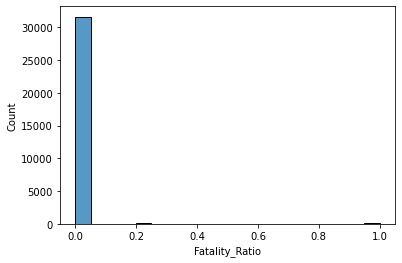

In [239]:
# Checking Distribution of Fatality Ratio

sns.histplot(data=df_merged, x='Fatality_Ratio', bins=20)

# Observation

We can observe that fatality ratio lies between 0 and 0.2 majorly with a few values over 0.2

In [240]:
# Creating a variable Injuries_to_Vehicles_Ratio 
# which is calculated by total number of injuries in a crash over number of vehicles invlved in the crash

df_merged['Injuries_to_Vehicles_Ratio'] = df_merged['INJURIES_TOTAL'] / df_merged['NUM_UNITS']

<AxesSubplot:xlabel='Injuries_to_Vehicles_Ratio', ylabel='Count'>

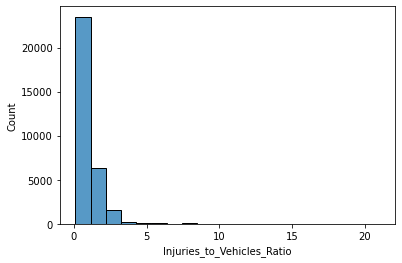

In [241]:
sns.histplot(data=df_merged, x='Injuries_to_Vehicles_Ratio', bins=20)

# Observation

The variable measures the ratio of number injuries suffered to number of vehicles involved in the crash.

The plot shows distribution of major values between 0 to 3

The ratio could be useful in judging the impact of the crash. The higher the ratio value means low number of vehicles leading to higher number of injuries and vice-versa

This ratio could also add meanig to geo-spatial analysis where we could oberve what locations are having higher Injuries_to_Vehicles ratio

# Missing Values Treatment

In [279]:
#Calculating mean age value

print(df_merged['AGE'].agg(['mean']).round(1))

mean    35.0
Name: AGE, dtype: float64


In [282]:
# Imputing missing age value with mean age value

df_merged['AGE'] = df_merged['AGE'].fillna(35)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

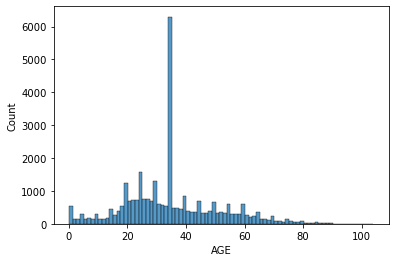

In [287]:
sns.histplot(data=df_merged, x='AGE')

In [303]:
#Imputing variables REPORT_TYPE, INTERSECTION_RELATED_I, HIT_AND_RUN_I, SEX missing values with 'Not Reported'

mylist= ['REPORT_TYPE', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'SEX', 'PHYSICAL_CONDITION']

for variable in mylist:
    df_merged[variable] = df_merged[variable].fillna('Not Reported')



<AxesSubplot:xlabel='REPORT_TYPE', ylabel='count'>

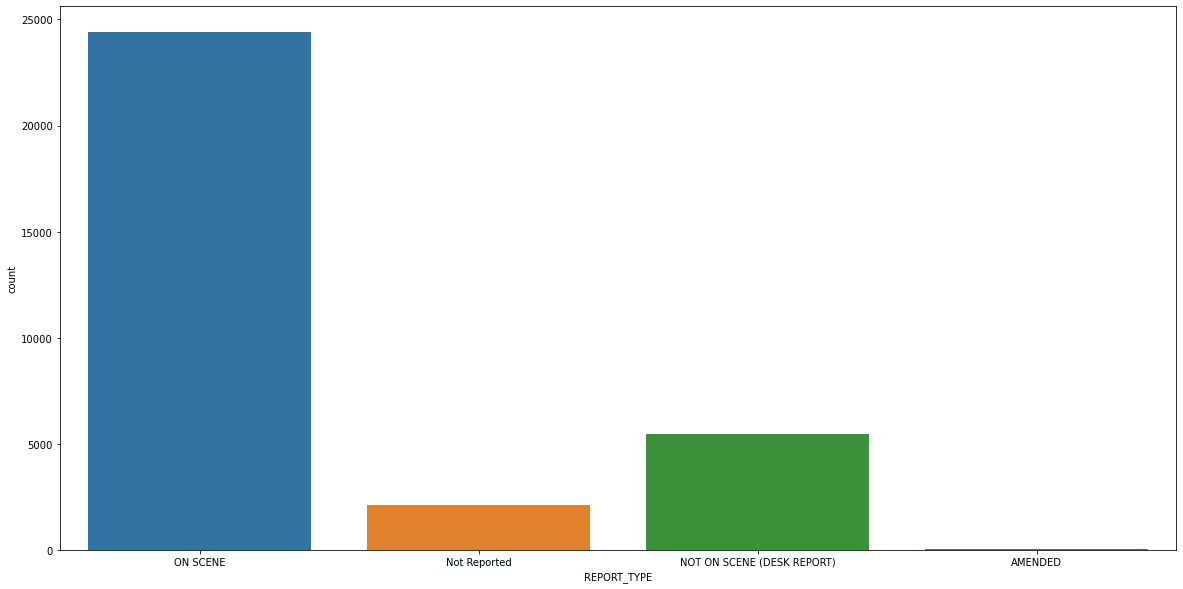

In [302]:
# Checking the effect of imputation on the variables

plt.figure(figsize=(20,10))
sns.countplot(data=df_merged, x= 'REPORT_TYPE')

<AxesSubplot:xlabel='INTERSECTION_RELATED_I', ylabel='count'>

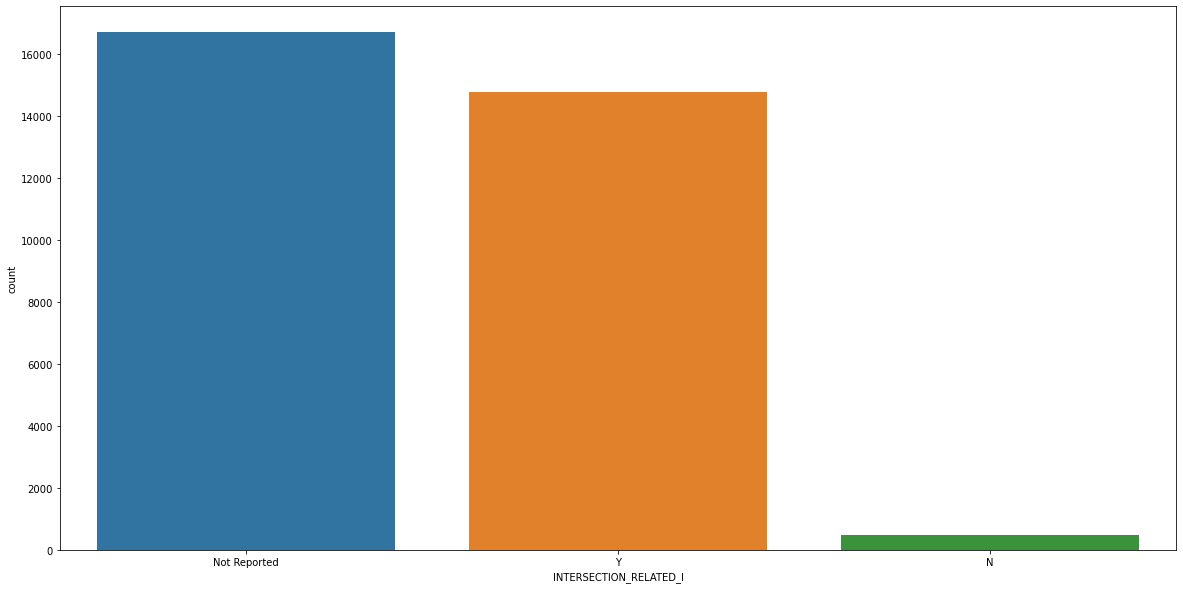

In [295]:
# Checking the effect of imputation on the variables


plt.figure(figsize=(20,10))
sns.countplot(data=df_merged, x= 'INTERSECTION_RELATED_I')

<AxesSubplot:xlabel='HIT_AND_RUN_I', ylabel='count'>

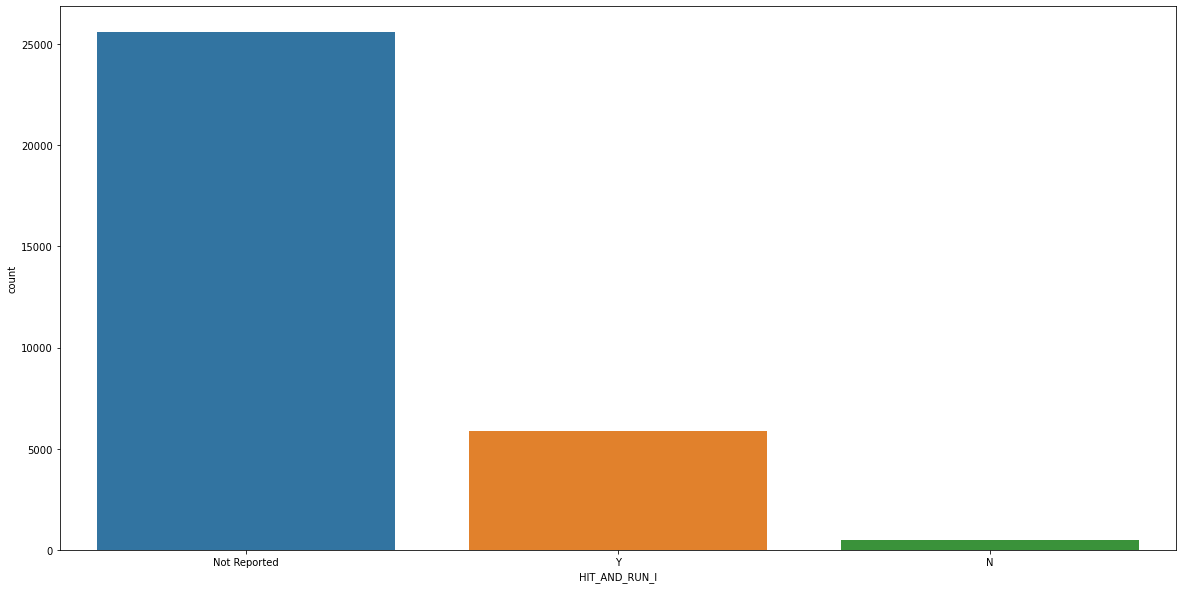

In [301]:
# Checking the effect of imputation on the variables


plt.figure(figsize=(20,10))
sns.countplot(data=df_merged, x= 'HIT_AND_RUN_I')

<AxesSubplot:xlabel='SEX', ylabel='count'>

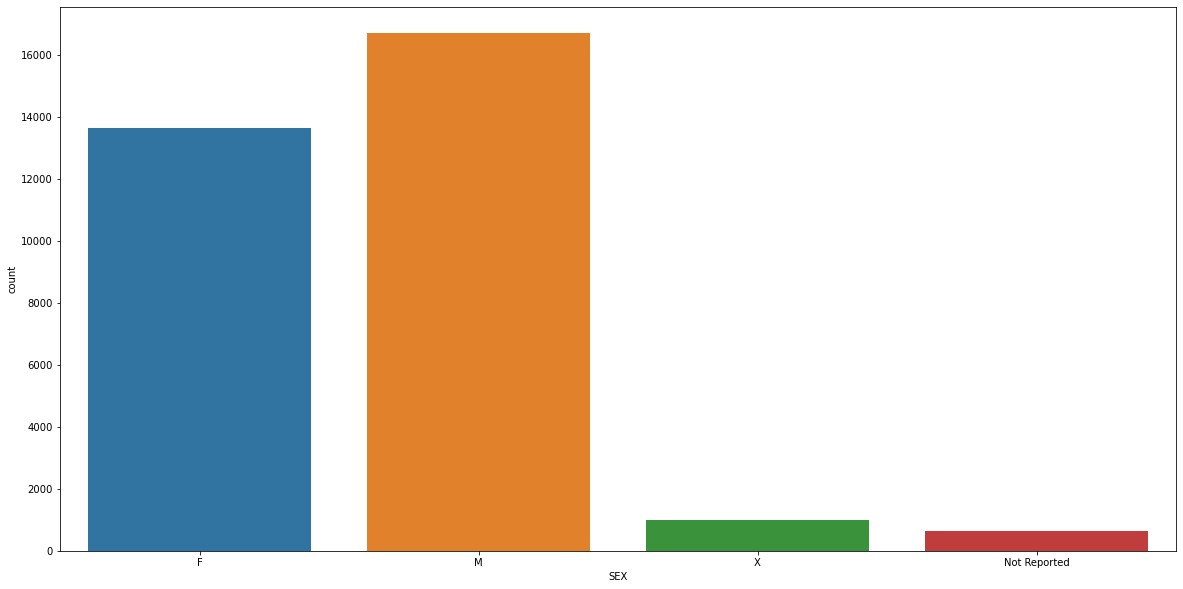

In [298]:
# Checking the effect of imputation on the variables


plt.figure(figsize=(20,10))
sns.countplot(data=df_merged, x= 'SEX')

<AxesSubplot:xlabel='PHYSICAL_CONDITION', ylabel='count'>

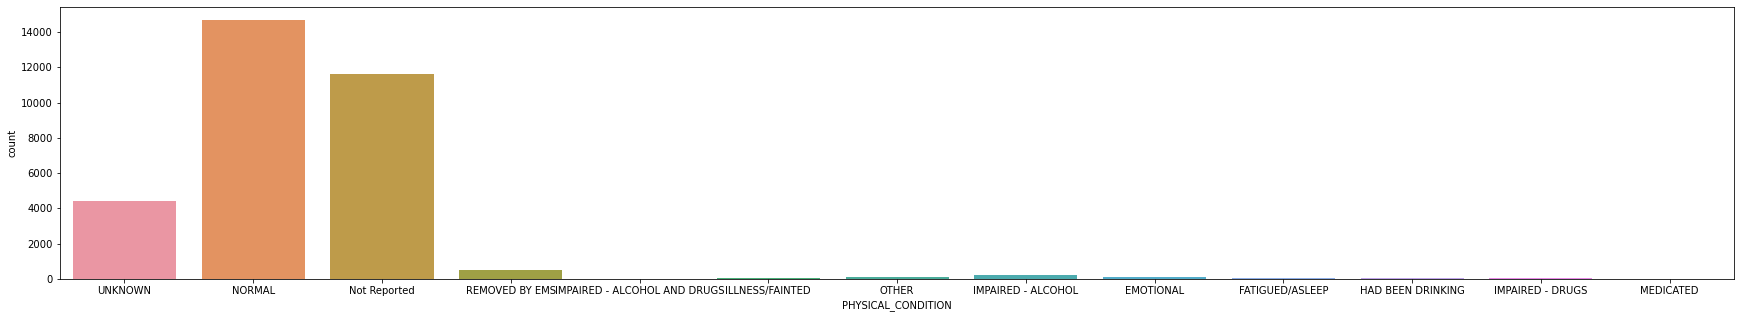

In [307]:
# Checking the effect of imputation on the variables

plt.figure(figsize=(30,5))
sns.countplot(data=df_merged, x= 'PHYSICAL_CONDITION')

In [308]:
#Imputing missing value of variables DRIVERS_LICENSE_STATE and DRIVERS_LICENSE_CLASS with value 'Not Reported or Not Applicable'

df_merged['DRIVERS_LICENSE_STATE'] = df_merged['DRIVERS_LICENSE_STATE'].fillna('Not Reported or Not Applicable')
df_merged['DRIVERS_LICENSE_CLASS'] = df_merged['DRIVERS_LICENSE_CLASS'].fillna('Not Reported or Not Applicable')



In [317]:
#Imputing missing values of variables DRIVER_ACTION, DRIVER_VISION, AIRBAG_DEPLOYED AND SAFETY_EQUIPMENT
# with value ‘Not Applicable for Person other than Driver’

mylist = ['DRIVER_ACTION', 'DRIVER_VISION', 'AIRBAG_DEPLOYED', 'SAFETY_EQUIPMENT']

for variable in mylist:
    df_merged[variable] = df_merged[variable].fillna('Not Applicable for Person other than Driver')



In [319]:
#Checking the missing value report to validate the changes made above

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31979 entries, 0 to 31978
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                31979 non-null  object        
 1   CRASH_DATE                     31979 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             31979 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         31979 non-null  object        
 4   DEVICE_CONDITION               31979 non-null  object        
 5   WEATHER_CONDITION              31979 non-null  object        
 6   LIGHTING_CONDITION             31979 non-null  object        
 7   FIRST_CRASH_TYPE               31979 non-null  object        
 8   TRAFFICWAY_TYPE                31979 non-null  object        
 9   ROADWAY_SURFACE_COND           31979 non-null  object        
 10  ROAD_DEFECT                    31979 non-null  object        
 11  REPORT_TYPE    

# Observation

Here we can observe that all our targetted variables' missing values have been imputed with the necessary values as per the context and logical understanding of the data.
This imputation shall help the Machine LEarning models perform better and give us a holistic insight which otherwise would have been impossible